# Importacion De Modulos

In [106]:
import pandas as pd
import plotly.express as px
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

In [5]:
# Configuración de estilos para matplotlib y seaborn
# plt.style.use('seaborn-whitegrid')  # Cambiado de 'seaborn' a 'seaborn-whitegrid'
plt.style.use('ggplot')  # Usa el estilo 'ggplot' que es similar al de seaborn
sns.set_theme(style="whitegrid")  # Configuración de tema para seaborn
sns.set_palette("deep")

# Importacion de Datos

In [6]:
df = pd.read_excel("datos_admin_barranca_v1.xlsx")
df.head(5)

,ESTP_ID,PENG_PRIMERAPELLIDO,PENG_SEGUNDOAPELLIDO,PENG_PRIMERNOMBRE,PENS_DESCRIPCION,FRAN_DESCRIPCION,ESTP_FECHAINGRESO,SITE_DESCRIPCION,MAAC_PROMEDIOGENERAL,ESTP_PROMEDIOGENERAL,MAAC_ID,CATE_DESCRIPCION,PENG_FECHANACIMIENTO,PENG_SEXO,PEUN_ID,ESTP_CREDITOSAPROBADOS,ESTP_PERIODOACADEMICO,PEUN_ANO,PEUN_PERIODO
0,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,16/7/2015 13:31:31,ACTIVO,4.44,4.17,265065,NUEVO REGULAR,20/5/1992 00:00:00,F,727,73,4,2015,2
1,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,16/7/2015 13:31:31,SOBRESALIENTE,4.15,4.17,306470,ANTIGUO,20/5/1992 00:00:00,F,767,73,4,2016,2
2,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,16/7/2015 13:31:31,ACTIVO,4.23,4.17,288683,ANTIGUO,20/5/1992 00:00:00,F,747,73,4,2016,1
3,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,16/7/2015 13:31:31,SOBRESALIENTE,4.17,4.17,342636,ANTIGUO,20/5/1992 00:00:00,F,770,73,4,2017,1
4,80750,R,G,MARLENE,PENSUM PAE2013-1 BCA,NOCTURNA,21/7/2015 13:38:47,ACTIVO,4.75,4.47,265865,NUEVO REGULAR,1989-06-04 00:00:00,F,727,73,4,2015,2


# Limpieza y Tranformacion de datos

In [7]:
df['ESTP_FECHAINGRESO'] = pd.to_datetime(df['ESTP_FECHAINGRESO'], dayfirst=True)
df['PENG_FECHANACIMIENTO'] = pd.to_datetime(df['PENG_FECHANACIMIENTO'], dayfirst=True)

df.dtypes

ESTP_ID                            int64
PENG_PRIMERAPELLIDO               object
PENG_SEGUNDOAPELLIDO              object
PENG_PRIMERNOMBRE                 object
PENS_DESCRIPCION                  object
FRAN_DESCRIPCION                  object
ESTP_FECHAINGRESO         datetime64[ns]
SITE_DESCRIPCION                  object
MAAC_PROMEDIOGENERAL             float64
ESTP_PROMEDIOGENERAL             float64
MAAC_ID                            int64
CATE_DESCRIPCION                  object
PENG_FECHANACIMIENTO      datetime64[ns]
PENG_SEXO                         object
PEUN_ID                            int64
ESTP_CREDITOSAPROBADOS             int64
ESTP_PERIODOACADEMICO              int64
PEUN_ANO                           int64
PEUN_PERIODO                       int64
dtype: object

In [8]:
df.head(5)

,ESTP_ID,PENG_PRIMERAPELLIDO,PENG_SEGUNDOAPELLIDO,PENG_PRIMERNOMBRE,PENS_DESCRIPCION,FRAN_DESCRIPCION,ESTP_FECHAINGRESO,SITE_DESCRIPCION,MAAC_PROMEDIOGENERAL,ESTP_PROMEDIOGENERAL,MAAC_ID,CATE_DESCRIPCION,PENG_FECHANACIMIENTO,PENG_SEXO,PEUN_ID,ESTP_CREDITOSAPROBADOS,ESTP_PERIODOACADEMICO,PEUN_ANO,PEUN_PERIODO
0,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,ACTIVO,4.44,4.17,265065,NUEVO REGULAR,1992-05-20,F,727,73,4,2015,2
1,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,SOBRESALIENTE,4.15,4.17,306470,ANTIGUO,1992-05-20,F,767,73,4,2016,2
2,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,ACTIVO,4.23,4.17,288683,ANTIGUO,1992-05-20,F,747,73,4,2016,1
3,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,SOBRESALIENTE,4.17,4.17,342636,ANTIGUO,1992-05-20,F,770,73,4,2017,1
4,80750,R,G,MARLENE,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-21 13:38:47,ACTIVO,4.75,4.47,265865,NUEVO REGULAR,1989-06-04,F,727,73,4,2015,2


# Analisis Explorativos

In [9]:
semestres_cursados = df.groupby("ESTP_ID").size()
semestres_cursados

ESTP_ID
80454     4
80750     4
81048     4
81078     4
81079     4
         ..
105853    1
106165    1
106166    1
106557    1
106919    1
Length: 97, dtype: int64

In [10]:
df.groupby(["ESTP_ID", "PENG_PRIMERNOMBRE"]).size()

ESTP_ID  PENG_PRIMERNOMBRE
80454    SANDRA               4
80750    MARLENE              4
81048    YUDIS                4
81078    DURLEY               4
81079    KELLY                4
                             ..
105853   JANICA               1
106165   JULIETH              1
106166   MARIA                1
106557   KATHERINE            1
106919   JOSE                 1
Length: 97, dtype: int64

In [11]:
df["semestre"] = df["PEUN_ANO"].astype(str) + "-" + df["PEUN_PERIODO"].astype(str)
#df.head()
#df.groupby("semestre").size()

In [12]:
df.groupby(["semestre", "ESTP_ID"]).size()

semestre  ESTP_ID
2015-2    80454      1
          80750      1
          81048      1
          81078      1
          81079      1
                    ..
2018-1    105853     1
          106165     1
          106166     1
          106557     1
          106919     1
Length: 291, dtype: int64

In [13]:
estudiantes_matriculados = df.groupby(["semestre"]).size()
estudiantes_matriculados

semestre
2015-2    21
2016-1    42
2016-2    56
2017-1    72
2017-2    52
2018-1    48
dtype: int64

# Analsiis Descriptivos

## Edad

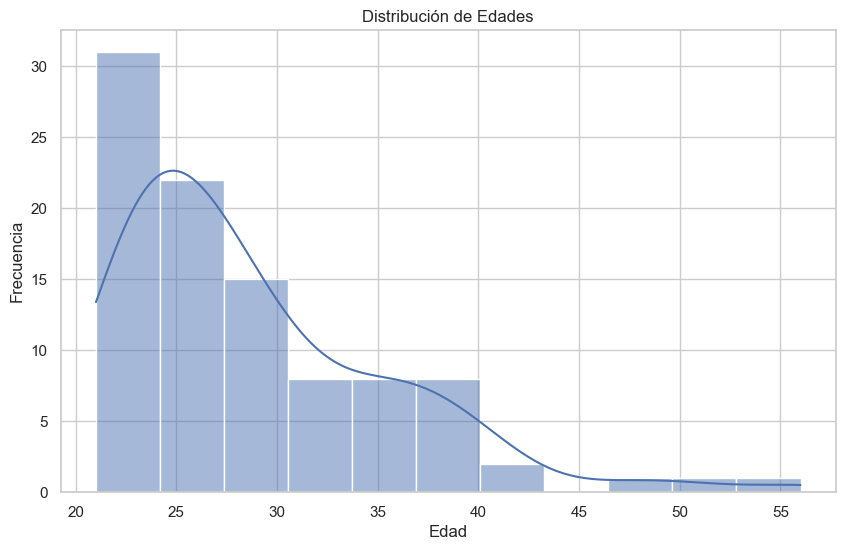

In [14]:
from datetime import datetime

# 4. Cálculo de edades y distribución (usando solo la última matrícula de cada estudiante)
fecha_referencia = pd.to_datetime('2018-07-01')
#hoy = datetime.now()
df['EDAD'] = fecha_referencia.year - df['PENG_FECHANACIMIENTO'].dt.year

# Obtener la última matrícula de cada estudiante
df_ultima_matricula = df.sort_values('ESTP_FECHAINGRESO').groupby('ESTP_ID').last().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(df_ultima_matricula['EDAD'], kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Sexo

PENG_SEXO
F    82
M    15
Name: count, dtype: int64


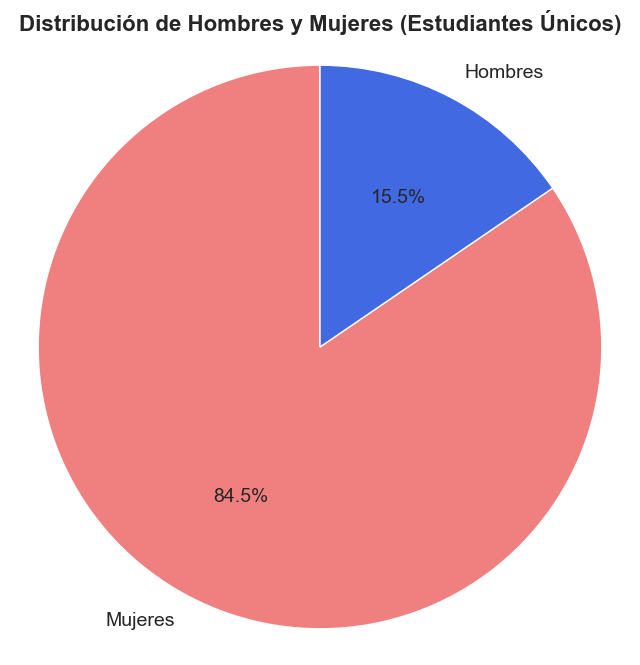

In [15]:
# Eliminar duplicados por ID de estudiante para contar cada alumno una sola vez
df_unico = df.drop_duplicates(subset='ESTP_ID')

# Contar el número de hombres y mujeres en el dataset único
conteo_sexo_unico = df_unico['PENG_SEXO'].value_counts()
print(conteo_sexo_unico)
# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_sexo_unico, labels=['Mujeres', 'Hombres'], colors=['lightcoral', 'royalblue'],
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})

# Personalizar el gráfico
plt.title('Distribución de Hombres y Mujeres (Estudiantes Únicos)', fontsize=16, fontweight='bold')

# Asegurar que el gráfico se vea como un círculo
plt.axis('equal')

# Mostrar la gráfica
plt.show()


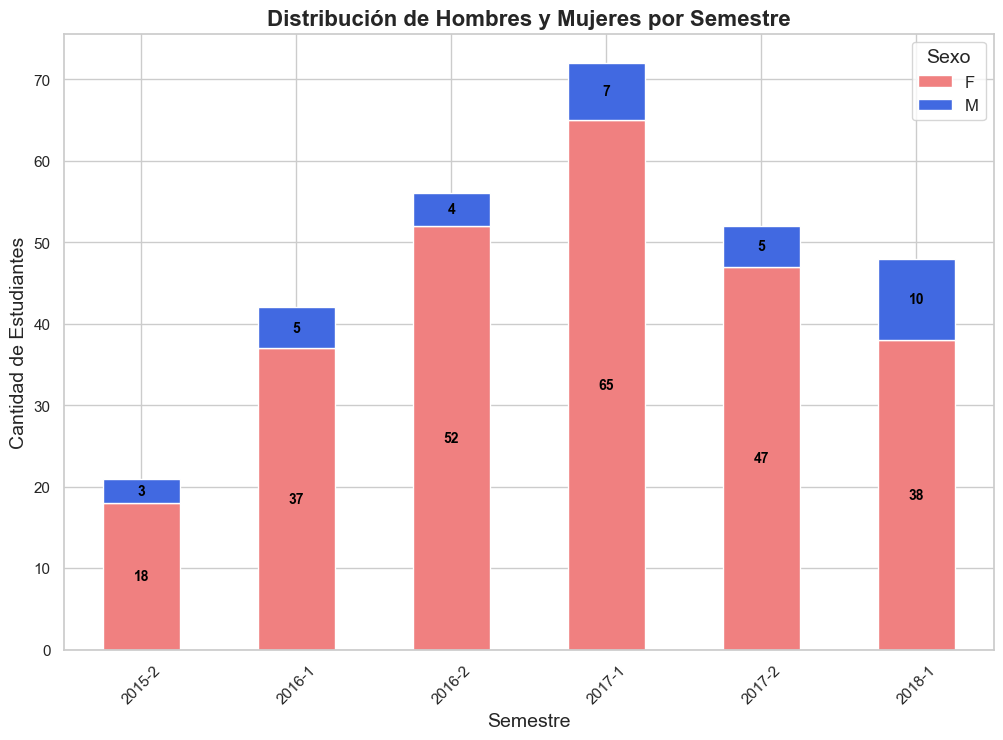

In [16]:
# Agrupar por semestre y sexo, y contar la cantidad de estudiantes en cada grupo
conteo_sexo_semestre = df.groupby(["semestre", "PENG_SEXO"]).size().unstack()

# Crear la gráfica de barras apiladas
ax = conteo_sexo_semestre.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightcoral', 'royalblue'])

# Personalizar el gráfico
plt.title('Distribución de Hombres y Mujeres por Semestre', fontsize=16, fontweight='bold')
plt.xlabel('Semestre', fontsize=14)
plt.ylabel('Cantidad de Estudiantes', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.legend(title='Sexo', fontsize=12, title_fontsize=14)  # Etiquetas de la leyenda

# Agregar etiquetas de la cantidad de estudiantes en cada barra apilada
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Solo agregar etiquetas si la altura es mayor a 0
        ax.text(x + width/2, y + height/2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Mostrar la gráfica
plt.show()


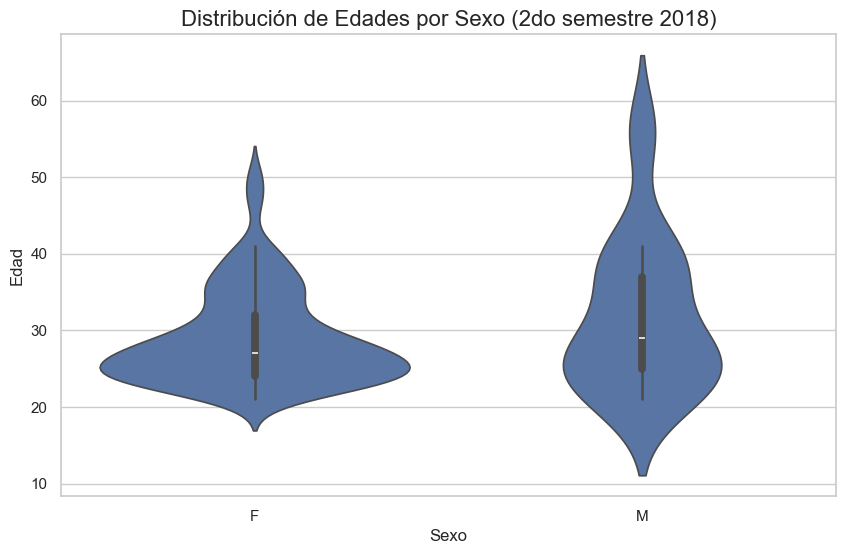

In [17]:
# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='PENG_SEXO', y='EDAD', data=df)

# Personalizar el gráfico
plt.title('Distribución de Edades por Sexo (2do semestre 2018)', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# Mostrar el gráfico
plt.show()

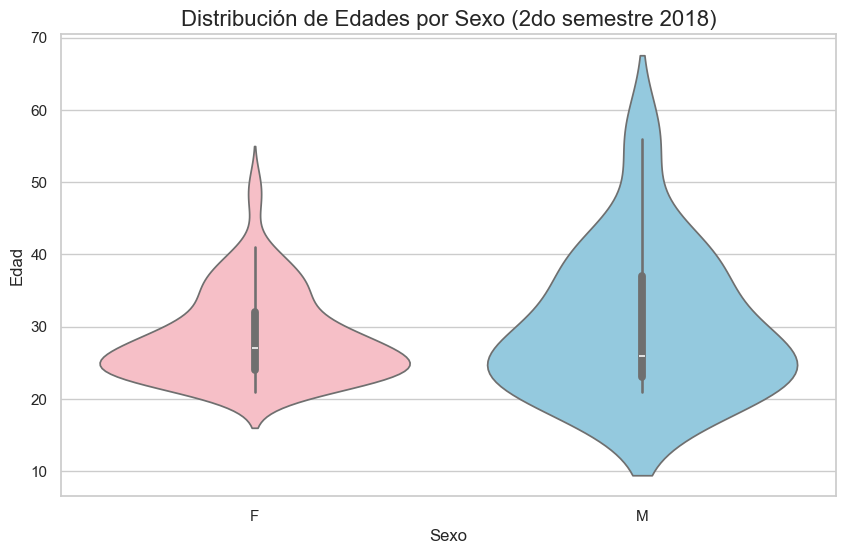

In [18]:
# Crear el gráfico de violín con colores personalizados
plt.figure(figsize=(10, 6))
sns.violinplot(x='PENG_SEXO', y='EDAD', data=df_ultima_matricula, hue='PENG_SEXO', 
               palette={"M": "skyblue", "F": "lightpink"}, legend=False)

# Personalizar el gráfico
plt.title('Distribución de Edades por Sexo (2do semestre 2018)', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# Mostrar el gráfico
plt.show()

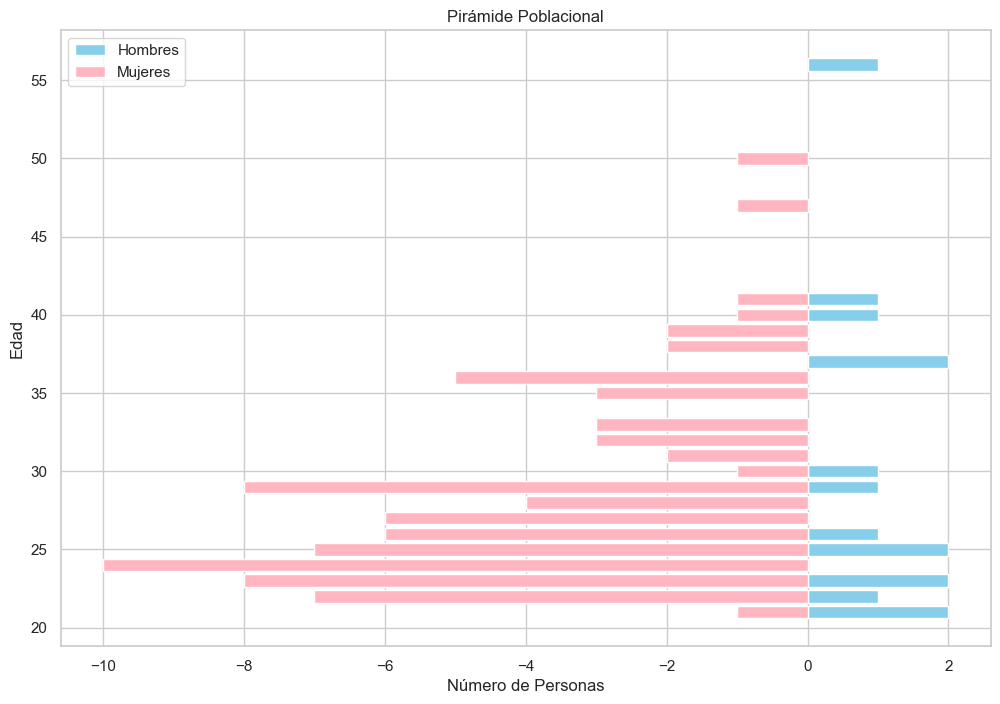

In [19]:
# Dividir los datos por sexo
df_male = df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == 'M']
df_female = df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == 'F']

# Contar el número de personas en cada grupo de edad para hombres y mujeres
age_distribution_male = df_male['EDAD'].value_counts().sort_index()
age_distribution_female = df_female['EDAD'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Graficar las edades para hombres y mujeres
plt.barh(age_distribution_male.index, age_distribution_male, color='skyblue', label='Hombres')
plt.barh(age_distribution_female.index, -age_distribution_female, color='lightpink', label='Mujeres')

# Personalizar el gráfico
plt.xlabel('Número de Personas')
plt.ylabel('Edad')
plt.title('Pirámide Poblacional')
plt.legend()

# Mostrar el gráfico
plt.show()

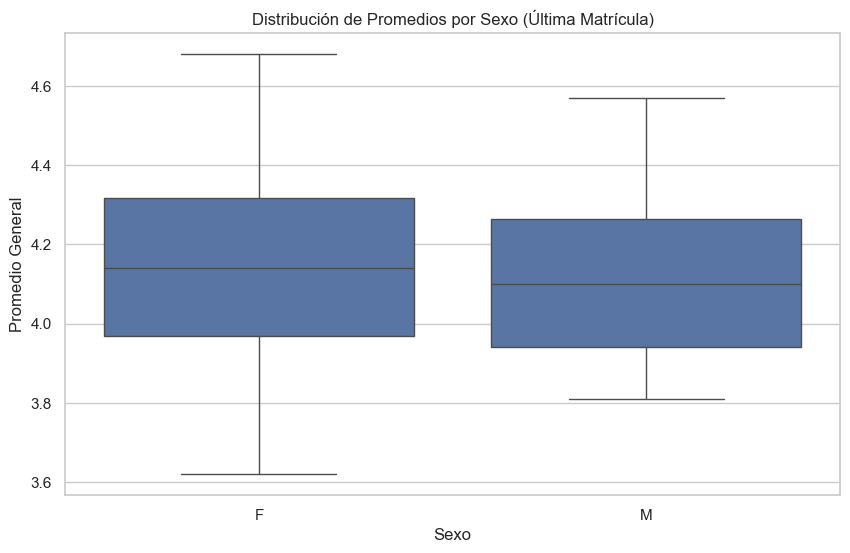

In [20]:
# 6. Distribución de promedios por sexo (usando la última matrícula)
plt.figure(figsize=(10, 6))
sns.boxplot(x='PENG_SEXO', y='ESTP_PROMEDIOGENERAL', data=df_ultima_matricula)
plt.title('Distribución de Promedios por Sexo (Última Matrícula)')
plt.xlabel('Sexo')
plt.ylabel('Promedio General')
plt.show()

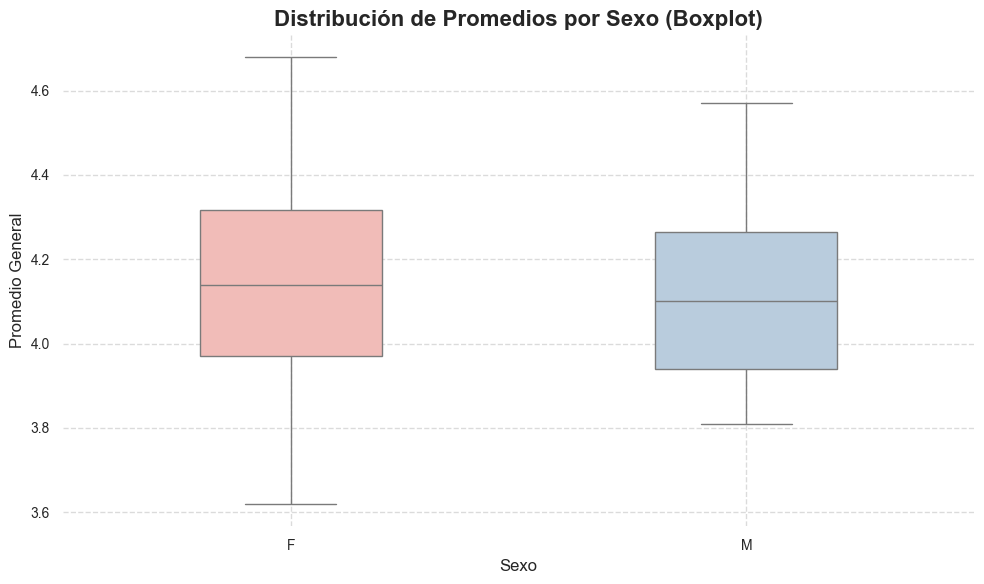

In [21]:
# Función para estilizar el gráfico
def style_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=16, weight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    sns.despine(ax=ax, left=True, bottom=True)
    ax.grid(True, linestyle='--', alpha=0.7)

# Gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
ax1 = sns.boxplot(x='PENG_SEXO', y='ESTP_PROMEDIOGENERAL', data=df_ultima_matricula, hue='PENG_SEXO', palette="Pastel1", width=0.4, legend=False)
style_plot(ax1, 'Distribución de Promedios por Sexo (Boxplot)', 'Sexo', 'Promedio General')
plt.tight_layout()
plt.show()

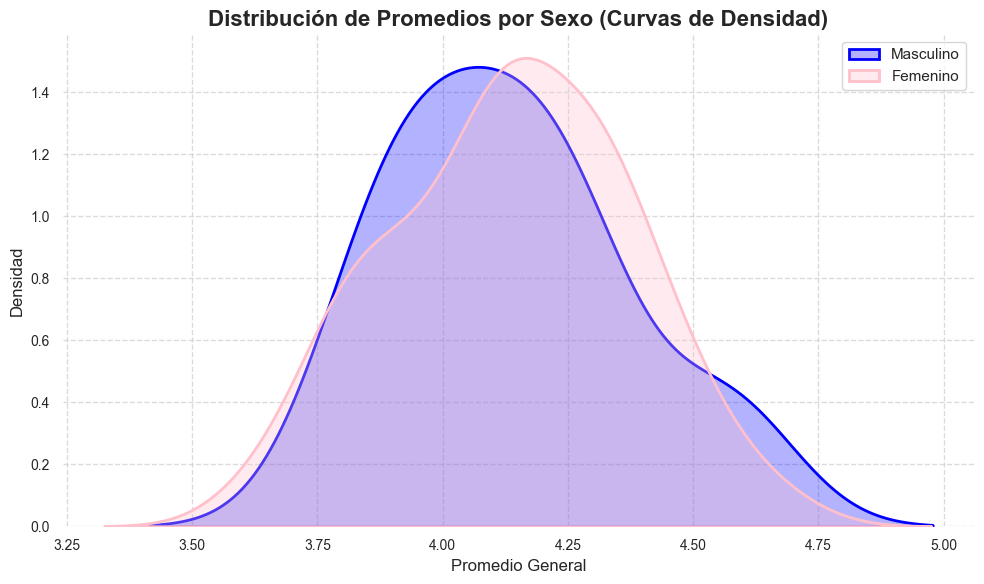

In [22]:
# Curvas de densidad (campanas de Gauss)
plt.figure(figsize=(10, 6))
ax2 = plt.gca()
for sexo, color, label in zip(['M', 'F'], ['blue', 'pink'], ['Masculino', 'Femenino']):
    sns.kdeplot(
        data=df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == sexo],
        x='ESTP_PROMEDIOGENERAL',
        color=color,
        fill=True,
        alpha=0.3,
        linewidth=2,
        ax=ax2,
        label=label
    )
style_plot(ax2, 'Distribución de Promedios por Sexo (Curvas de Densidad)', 'Promedio General', 'Densidad')
ax2.legend()
plt.tight_layout()
plt.show()

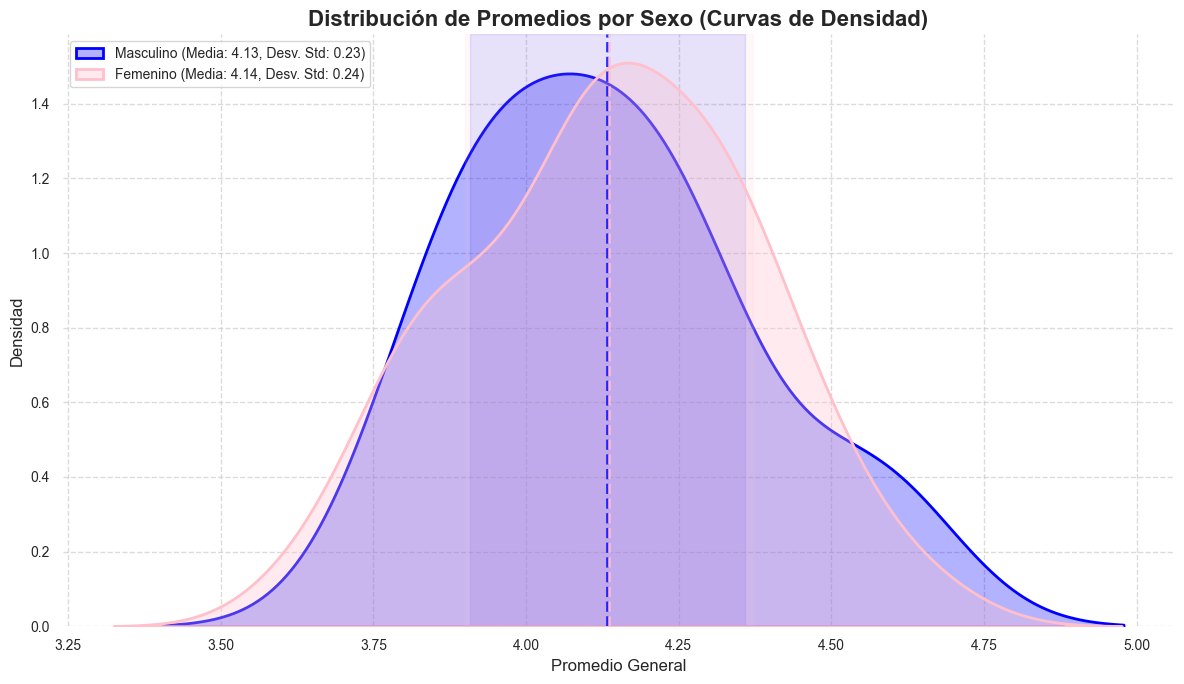

In [24]:
# Curvas de densidad (campanas de Gauss) con media y desviación estándar
plt.figure(figsize=(12, 7))
ax2 = plt.gca()

for sexo, color, label in zip(['M', 'F'], ['blue', 'pink'], ['Masculino', 'Femenino']):
    data = df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == sexo]['ESTP_PROMEDIOGENERAL']
    
    # Calcular media y desviación estándar
    media = np.mean(data)
    desv_std = np.std(data)
    
    # Dibujar la curva de densidad
    sns.kdeplot(
        data=data,
        color=color,
        fill=True,
        alpha=0.3,
        linewidth=2,
        ax=ax2,
        label=f'{label} (Media: {media:.2f}, Desv. Std: {desv_std:.2f})'
    )
    
    # Añadir línea vertical para la media
    ax2.axvline(media, color=color, linestyle='--', linewidth=2, alpha=0.8)
    
    # Añadir área sombreada para la desviación estándar
    ax2.axvspan(media - desv_std, media + desv_std, color=color, alpha=0.1)

style_plot(ax2, 'Distribución de Promedios por Sexo (Curvas de Densidad)', 'Promedio General', 'Densidad')
ax2.legend(loc='upper left', fontsize=10)

# Ajustar los límites del eje x para que se vea bien
xlim = ax2.get_xlim()
ax2.set_xlim(max(0, xlim[0]), xlim[1])  # Asegurarse de que el límite inferior no sea negativo

plt.tight_layout()
plt.show()

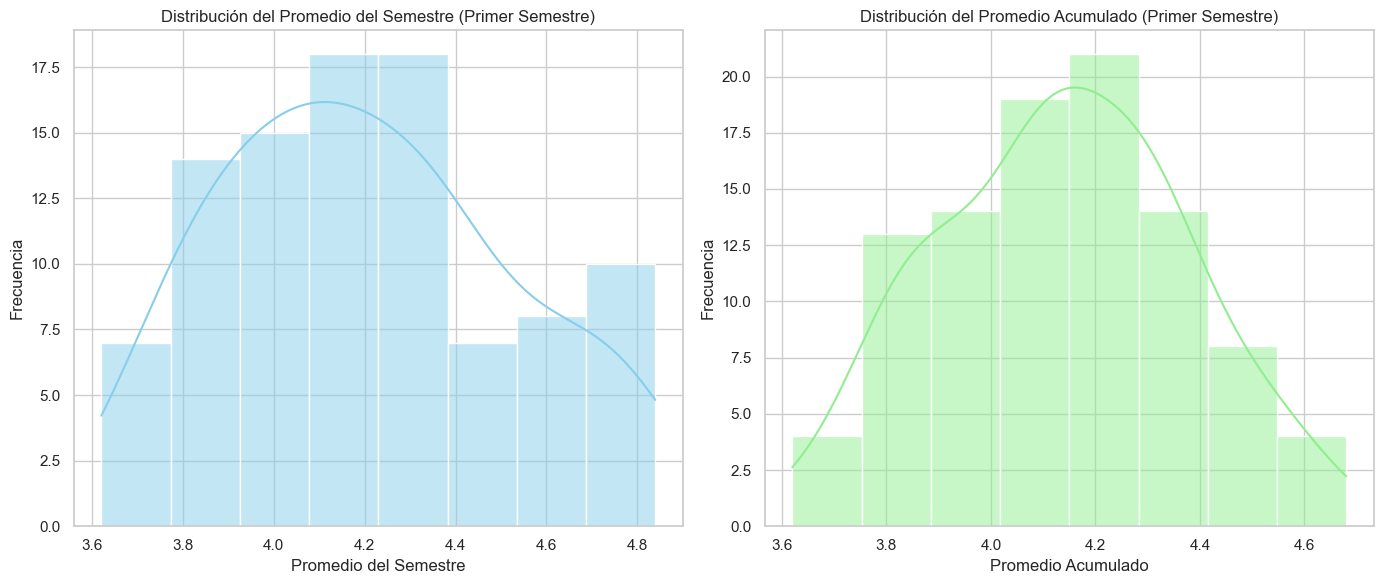

In [25]:
# Resetear el índice de 'primer_semestre_estudiante' para poder hacer un merge
primer_semestre_estudiante = df.groupby('ESTP_ID')['semestre'].min()
primer_semestre_estudiante = primer_semestre_estudiante.reset_index()

# Hacer un merge con el DataFrame original para obtener solo los registros del primer semestre de cada estudiante
primer_semestre_data = df.merge(primer_semestre_estudiante, on=['ESTP_ID', 'semestre'])

# Crear una figura con dos subplots (gráficos)
plt.figure(figsize=(14, 6))

# Gráfico 1: Promedio del semestre (MAAC_PROMEDIOGENERAL)
plt.subplot(1, 2, 1)
sns.histplot(primer_semestre_data['MAAC_PROMEDIOGENERAL'], kde=True, color='skyblue')
plt.title('Distribución del Promedio del Semestre (Primer Semestre)')
plt.xlabel('Promedio del Semestre')
plt.ylabel('Frecuencia')

# Gráfico 2: Promedio acumulado (ESTP_PROMEDIOGENERAL)
plt.subplot(1, 2, 2)
sns.histplot(primer_semestre_data['ESTP_PROMEDIOGENERAL'], kde=True, color='lightgreen')
plt.title('Distribución del Promedio Acumulado (Primer Semestre)')
plt.xlabel('Promedio Acumulado')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

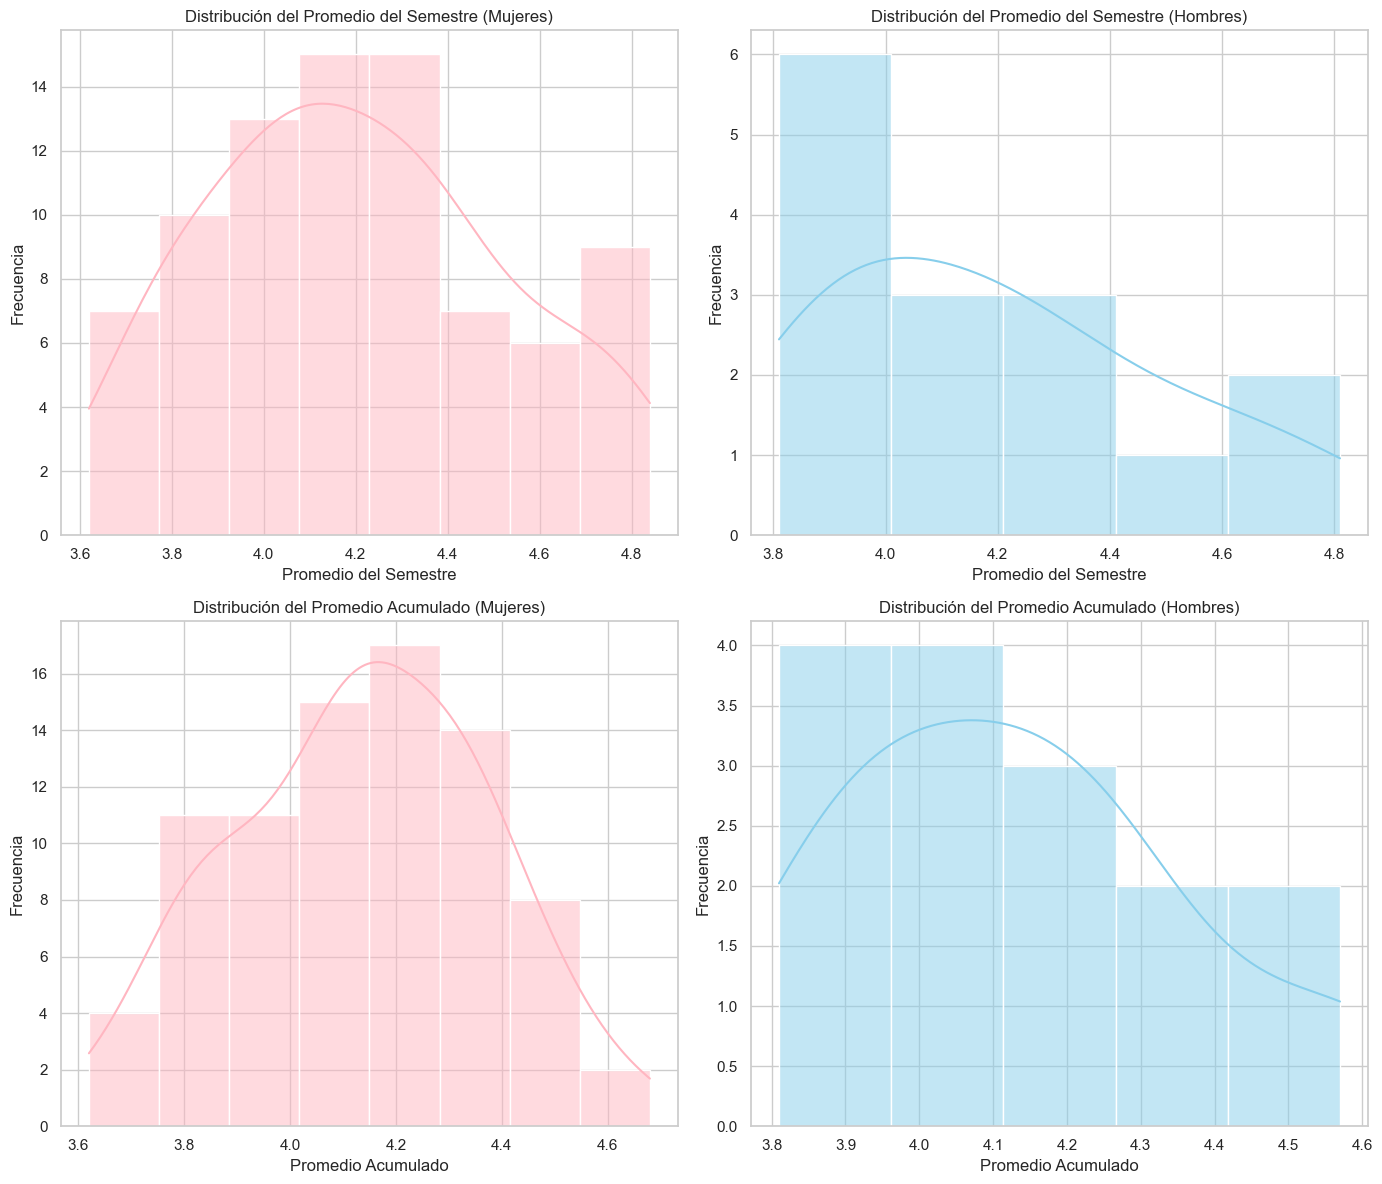

In [26]:
# Crear una figura con dos subplots (gráficos) para cada sexo
plt.figure(figsize=(14, 12))

# Gráfico 1: Promedio del semestre (MAAC_PROMEDIOGENERAL) por sexo
plt.subplot(2, 2, 1)
sns.histplot(primer_semestre_data[primer_semestre_data['PENG_SEXO'] == 'F']['MAAC_PROMEDIOGENERAL'], kde=True, color='lightpink')
plt.title('Distribución del Promedio del Semestre (Mujeres)')
plt.xlabel('Promedio del Semestre')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.histplot(primer_semestre_data[primer_semestre_data['PENG_SEXO'] == 'M']['MAAC_PROMEDIOGENERAL'], kde=True, color='skyblue')
plt.title('Distribución del Promedio del Semestre (Hombres)')
plt.xlabel('Promedio del Semestre')
plt.ylabel('Frecuencia')

# Gráfico 2: Promedio acumulado (ESTP_PROMEDIOGENERAL) por sexo
plt.subplot(2, 2, 3)
sns.histplot(primer_semestre_data[primer_semestre_data['PENG_SEXO'] == 'F']['ESTP_PROMEDIOGENERAL'], kde=True, color='lightpink')
plt.title('Distribución del Promedio Acumulado (Mujeres)')
plt.xlabel('Promedio Acumulado')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.histplot(primer_semestre_data[primer_semestre_data['PENG_SEXO'] == 'M']['ESTP_PROMEDIOGENERAL'], kde=True, color='skyblue')
plt.title('Distribución del Promedio Acumulado (Hombres)')
plt.xlabel('Promedio Acumulado')
plt.ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Calificaciones

  semestre  MAAC_PROMEDIOGENERAL
0   2015-2              4.581905
1   2016-1              4.351190
2   2016-2              4.178929
3   2017-1              4.187917
4   2017-2              4.131731
5   2018-1              4.016875


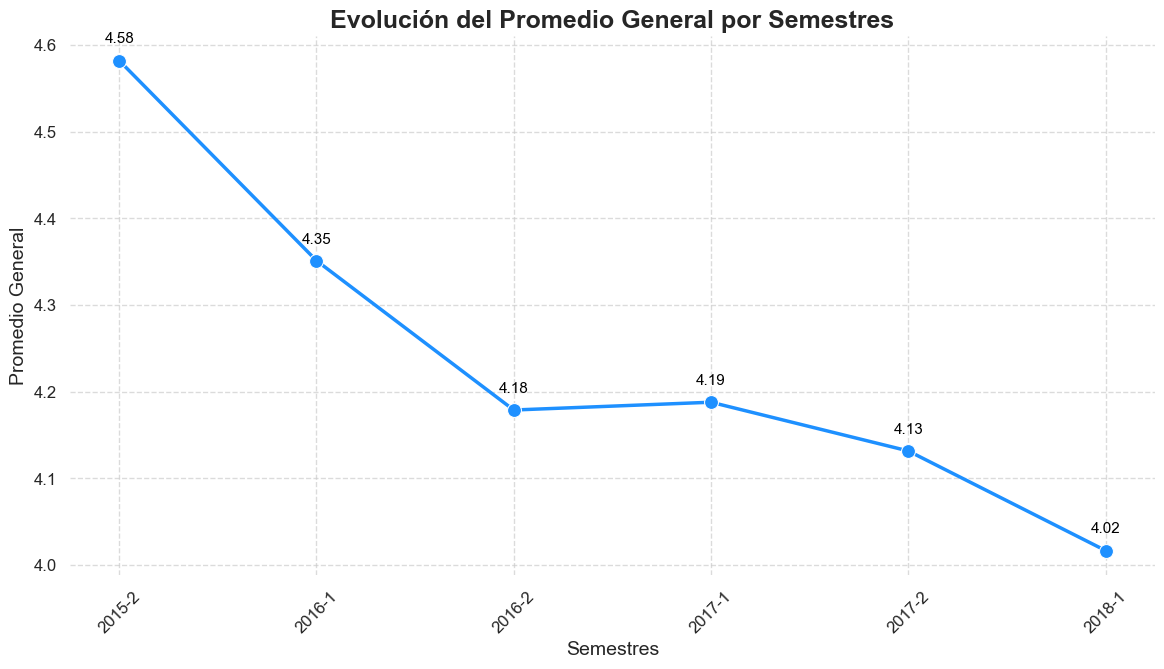

In [27]:
# Agrupar por semestre y calcular el promedio general
promedio_general_semestre = df.groupby(["semestre"])["MAAC_PROMEDIOGENERAL"].mean().reset_index()
print(promedio_general_semestre)

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar la línea con un suavizado y marcadores
sns.lineplot(
    data=promedio_general_semestre, 
    x='semestre', 
    y='MAAC_PROMEDIOGENERAL', 
    marker='o', 
    color='dodgerblue', 
    linewidth=2.5, 
    markersize=10
)

# Añadir anotaciones para cada punto
for i in range(len(promedio_general_semestre)):
    plt.text(
        x=promedio_general_semestre['semestre'][i], 
        y=promedio_general_semestre['MAAC_PROMEDIOGENERAL'][i] + 0.02,  # Ajustar posición de la etiqueta
        s=f"{promedio_general_semestre['MAAC_PROMEDIOGENERAL'][i]:.2f}",
        ha='center',
        fontsize=11,
        color='black'
    )

# Estilizar el título y etiquetas
plt.title('Evolución del Promedio General por Semestres', fontsize=18, weight='bold')
plt.xlabel('Semestres', fontsize=14)
plt.ylabel('Promedio General', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo y bordes a los gráficos
sns.despine(left=True, bottom=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

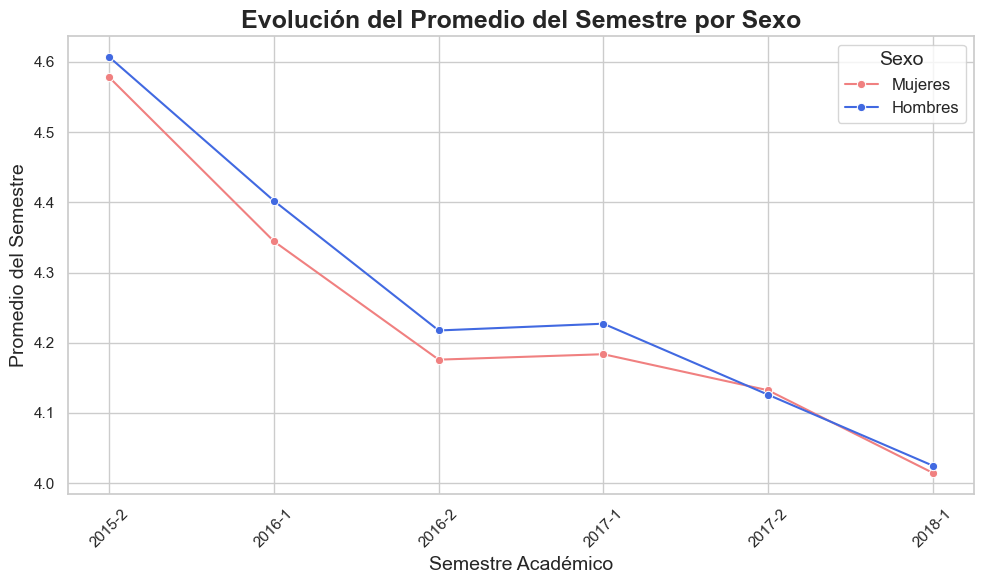

In [28]:
# Calcular el promedio del semestre (MAAC_PROMEDIOGENERAL) por cada semestre y sexo
promedio_por_semestre_sexo = df.groupby(['semestre', 'PENG_SEXO'])['MAAC_PROMEDIOGENERAL'].mean().reset_index()

# Crear la gráfica de líneas con diferentes colores para cada sexo
plt.figure(figsize=(10, 6))
sns.lineplot(x='semestre', y='MAAC_PROMEDIOGENERAL', hue='PENG_SEXO', data=promedio_por_semestre_sexo, 
             marker='o', palette={'F': 'lightcoral', 'M': 'royalblue'})

# Personalizar el gráfico
plt.title('Evolución del Promedio del Semestre por Sexo', fontsize=18, fontweight='bold')
plt.xlabel('Semestre Académico', fontsize=14)
plt.ylabel('Promedio del Semestre', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura

# Ajustar la leyenda
leyenda = plt.legend(title='Sexo', fontsize=12, title_fontsize=14)
leyenda.get_texts()[0].set_text('Mujeres')  # Primera etiqueta
leyenda.get_texts()[1].set_text('Hombres')  # Segunda etiqueta

plt.grid(True)

# Ajustar diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

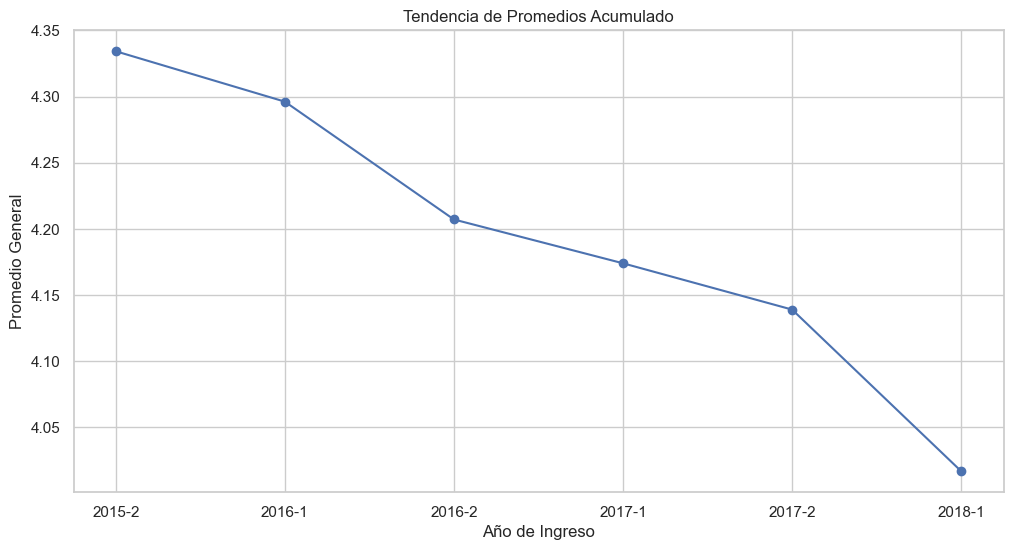

In [29]:
# 8. Tendencia de promedios a lo largo del tiempo
df['ESTP_FECHAINGRESO'] = pd.to_datetime(df['ESTP_FECHAINGRESO'])
df['ANO_INGRESO'] = df['ESTP_FECHAINGRESO'].dt.year

#promedios_por_ano = df.groupby('ANO_INGRESO')['ESTP_PROMEDIOGENERAL'].mean()
promedios_acumulado = df.groupby('semestre')['ESTP_PROMEDIOGENERAL'].mean()
plt.figure(figsize=(12, 6))
promedios_acumulado.plot(kind='line', marker='o')
plt.title('Tendencia de Promedios Acumulado')
plt.xlabel('Año de Ingreso')
plt.ylabel('Promedio General')
plt.show()

## Conteo

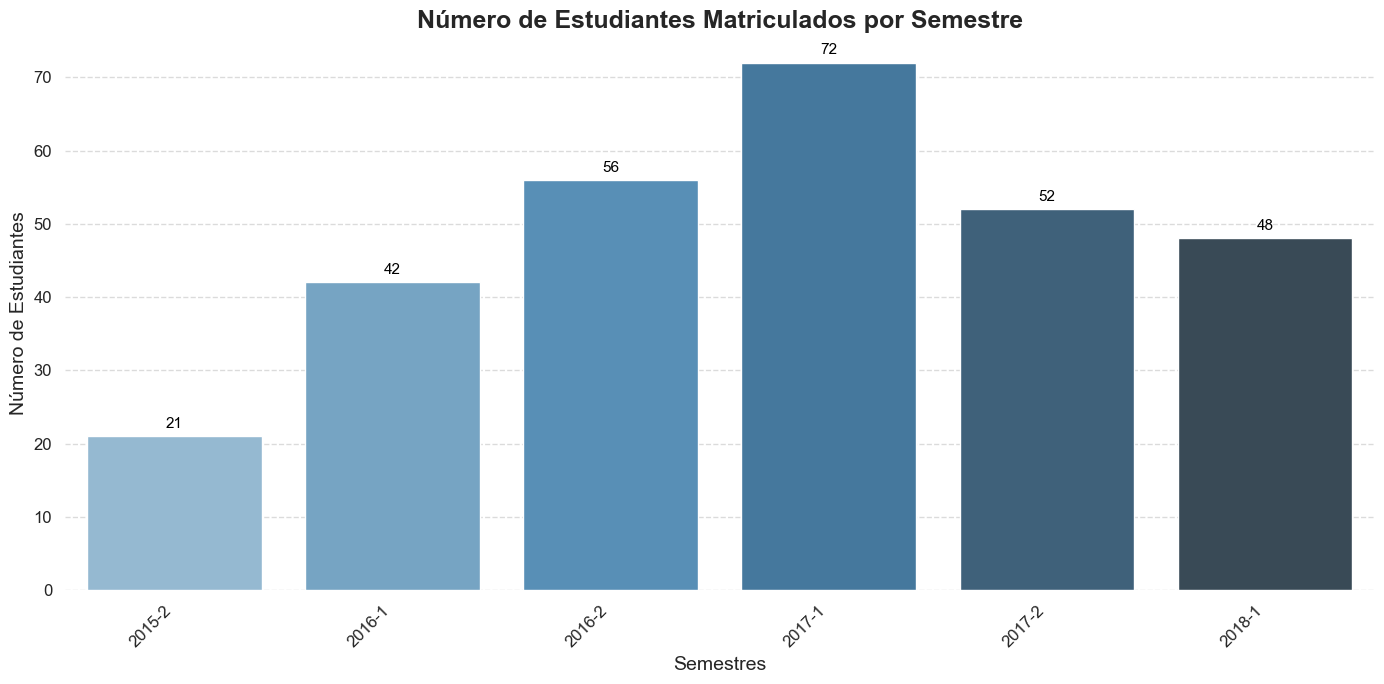

In [30]:
# Crear la figura y los ejes
plt.figure(figsize=(14, 7))

# Graficar barras con colores
ax = sns.barplot(
    x=estudiantes_matriculados.index,
    y=estudiantes_matriculados.values,
    hue=estudiantes_matriculados.index,  # Asignar 'hue' al índice
    palette="Blues_d",
    legend=False  # Ocultar la leyenda
)

# Añadir anotaciones en la parte superior de cada barra
for i, v in enumerate(estudiantes_matriculados.values):
    ax.text(
        i,
        v + 0.01 * max(estudiantes_matriculados.values),  # Ajustar posición de la etiqueta
        f"{v:,}",  # Formato con comas para miles
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

# Estilizar el título y etiquetas
plt.title('Número de Estudiantes Matriculados por Semestre', fontsize=18, fontweight='bold')
plt.xlabel('Semestres', fontsize=14)
plt.ylabel('Número de Estudiantes', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo y bordes a los gráficos
sns.despine(left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [31]:
df.groupby(["semestre", "CATE_DESCRIPCION"]).size()

semestre  CATE_DESCRIPCION           
2015-2    NUEVO REGULAR                  21
2016-1    ANTIGUO                        18
          NUEVO REGULAR                  24
2016-2    ANTIGUO                        41
          NUEVO REGULAR                  15
2017-1    ANTIGUO                        55
          NUEVO REGULAR                  17
2017-2    ANTIGUO                        51
          NUEVO TRANSFERENCIA INTERNA     1
2018-1    ANTIGUO                        30
          NUEVO REGULAR                  18
dtype: int64

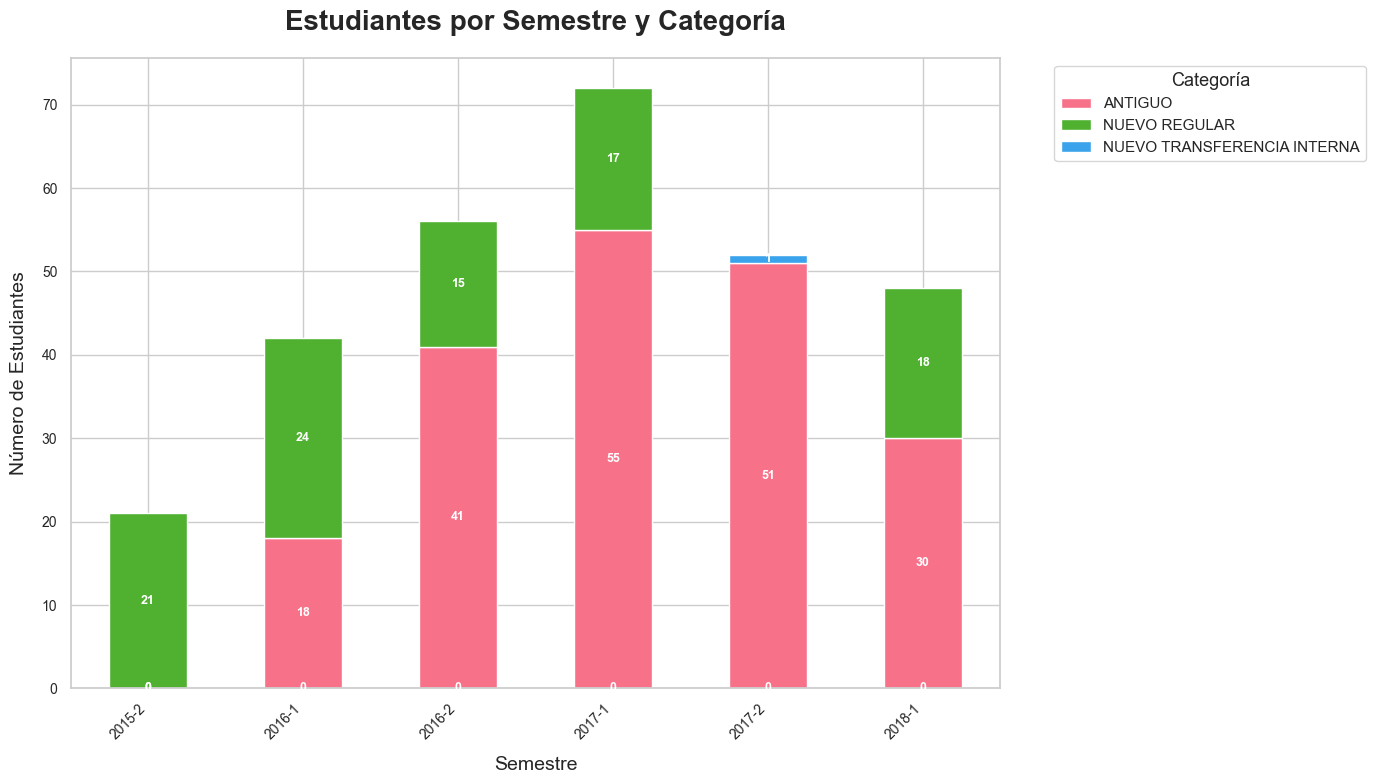

In [32]:
# Reorganizar los datos
df_pivot = df.groupby(["semestre", "CATE_DESCRIPCION"]).size().unstack(fill_value=0)

# Elegir una paleta de colores
# Puedes cambiar 'Set2' por otras opciones como 'Set1', 'Set3', 'Paired', 'husl', etc.
#color_palette = sns.color_palette("Set2")
color_palette = sns.color_palette("husl", n_colors=len(df_pivot.columns))

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el gráfico de barras apiladas con la nueva paleta de colores
df_pivot.plot(kind='bar', stacked=True, ax=ax, color=color_palette)

# Personalizar el gráfico
plt.title('Estudiantes por Semestre y Categoría', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Semestre', fontsize=14, labelpad=10)
plt.ylabel('Número de Estudiantes', fontsize=14, labelpad=10)
plt.legend(title='Categoría', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Añadir etiquetas de valor en cada segmento
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=9, fontweight='bold', color='white')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

## Creditos

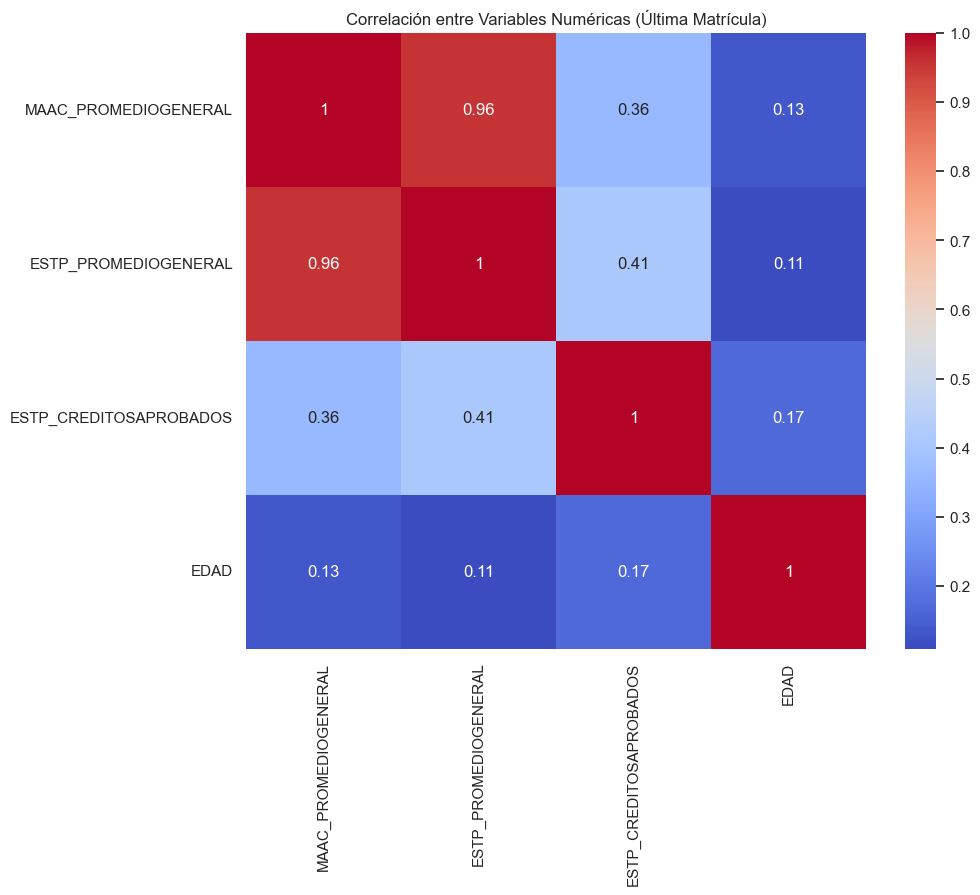

In [33]:
# 7. Correlación entre variables numéricas (usando la última matrícula)
numericas = ['MAAC_PROMEDIOGENERAL', 'ESTP_PROMEDIOGENERAL', 'ESTP_CREDITOSAPROBADOS', 'EDAD']
corr = df_ultima_matricula[numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas (Última Matrícula)')
plt.show()

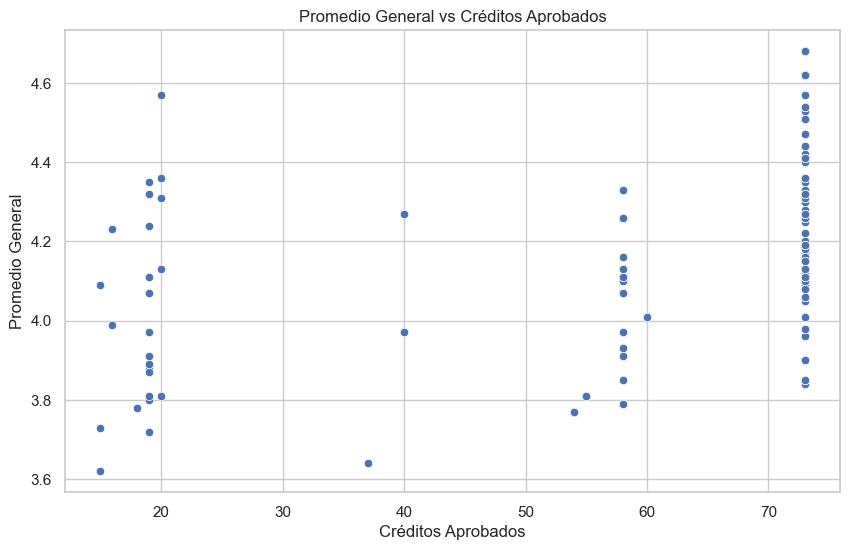

In [47]:
# 5. Promedio general vs Créditos aprobados (usando la última matrícula)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ESTP_CREDITOSAPROBADOS', y='ESTP_PROMEDIOGENERAL')
plt.title('Promedio General vs Créditos Aprobados')
plt.xlabel('Créditos Aprobados')
plt.ylabel('Promedio General')
plt.show()

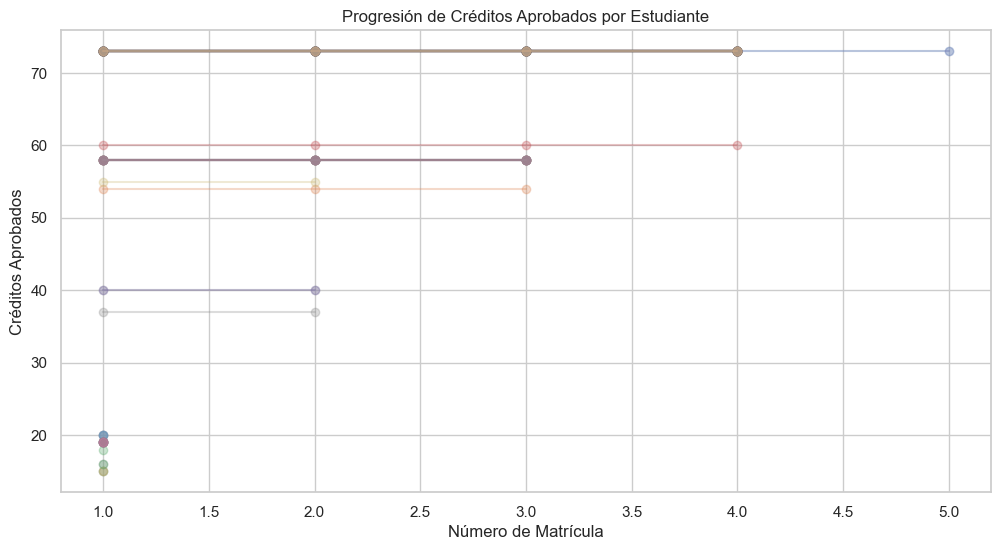

In [34]:
# 9. Progresión de créditos aprobados por estudiante
df_progresion = df.sort_values(['ESTP_ID', 'ESTP_FECHAINGRESO'])
df_progresion['MATRICULA_NUM'] = df_progresion.groupby('ESTP_ID').cumcount() + 1

plt.figure(figsize=(12, 6))
for _, estudiante in df_progresion.groupby('ESTP_ID'):
    plt.plot(estudiante['MATRICULA_NUM'], estudiante['ESTP_CREDITOSAPROBADOS'], 'o-', alpha=0.3)

plt.title('Progresión de Créditos Aprobados por Estudiante')
plt.xlabel('Número de Matrícula')
plt.ylabel('Créditos Aprobados')
plt.show()

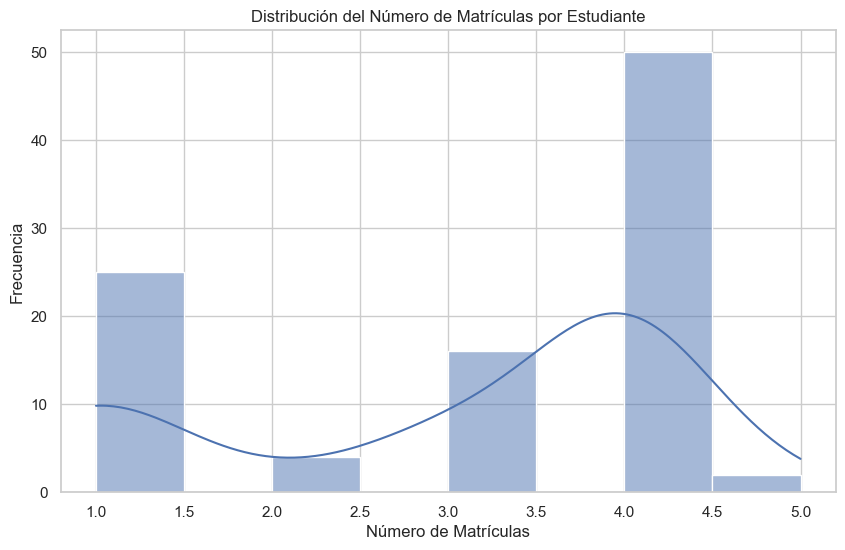

Promedio de matrículas por estudiante: 3.00
Mediana de matrículas por estudiante: 4.00
Moda de matrículas por estudiante: 4


In [35]:
# 10. Distribución del número de matrículas por estudiante
num_matriculas = df.groupby('ESTP_ID').size()
plt.figure(figsize=(10, 6))
sns.histplot(num_matriculas, kde=True)
plt.title('Distribución del Número de Matrículas por Estudiante')
plt.xlabel('Número de Matrículas')
plt.ylabel('Frecuencia')
plt.show()

print(f"Promedio de matrículas por estudiante: {num_matriculas.mean():.2f}")
print(f"Mediana de matrículas por estudiante: {num_matriculas.median():.2f}")
print(f"Moda de matrículas por estudiante: {num_matriculas.mode()[0]}")

# Desercion

In [36]:
import pandas as pd
import numpy as np

# Función para obtener una lista de los semestres anteriores dados un año, un periodo, y cuántos semestres atrás se requieren
def obtener_semestres_anteriores(año, periodo, cantidad_semestres_atras):
    año = int(año)
    periodo = int(periodo)
    semestres_anteriores = []
    
    # Iterar la cantidad de semestres atrás solicitada
    for _ in range(cantidad_semestres_atras):
        if periodo == 1:
            año -= 1
            periodo = 2
        else:
            periodo -= 1
        semestre = f"{año}-{periodo}"
        semestres_anteriores.append(semestre)
    
    return semestres_anteriores

# Obtener lista única de semestres ordenados cronológicamente
lista_semestres = sorted(df['semestre'].unique())

# Obtener el número de semestres en los que cada estudiante se ha matriculado
semestres_cursados = df.groupby("ESTP_ID").size()

# Función para identificar desertores en un semestre específico, excluyendo los que ya se han matriculado 4 veces
def identificar_desertores(df, semestre_actual):
    # Obtener los dos semestres anteriores al semestre actual
    año_actual, periodo_actual = semestre_actual.split('-')
    semestres_ant = obtener_semestres_anteriores(año_actual, periodo_actual, 2)
    semestre_anterior_1, semestre_anterior_2 = semestres_ant[0], semestres_ant[1]
    
    # Conjuntos de estudiantes matriculados en el semestre actual y en los dos semestres anteriores
    estudiantes_actuales = set(df[df['semestre'] == semestre_actual]['ESTP_ID'])
    estudiantes_semestre_anterior_1 = set(df[df['semestre'] == semestre_anterior_1]['ESTP_ID'])
    estudiantes_semestre_anterior_2 = set(df[df['semestre'] == semestre_anterior_2]['ESTP_ID'])
    
    # Identificar desertores: Estudiantes que estuvieron matriculados hace dos semestres pero no en los dos semestres siguientes
    desertores = estudiantes_semestre_anterior_2 - (estudiantes_actuales | estudiantes_semestre_anterior_1)
    
    # Excluir a los estudiantes que ya se matricularon 4 veces
    desertores = {est_id for est_id in desertores if semestres_cursados[est_id] < 4}
    
    return desertores

# Identificar desertores para cada semestre, excluyendo los dos primeros (ya que no hay dos semestres anteriores para comparar)
desertores_por_semestre = {}
for semestre in lista_semestres[2:]:
    desertores = identificar_desertores(df, semestre)
    if desertores:
        desertores_por_semestre[semestre] = desertores

# Imprimir resultados de desertores por semestre
for semestre, desertores in desertores_por_semestre.items():
    print(f"\nDesertores en el semestre {semestre}:")
    for desertor_id in desertores:
        # Extraer la información del desertor utilizando su ID
        info_desertor = df[df['ESTP_ID'] == desertor_id].iloc[0]
        nombre_desertor = f"{info_desertor['PENG_PRIMERNOMBRE']} {info_desertor['PENG_PRIMERAPELLIDO']}"
        print(f"ID: {desertor_id}, Nombre: {nombre_desertor}")



Desertores en el semestre 2016-2:
ID: 83040, Nombre: LUISA L
ID: 83042, Nombre: LAURA B

Desertores en el semestre 2017-1:
ID: 81249, Nombre: RICARDO C
ID: 88417, Nombre: OSCAR S
ID: 86271, Nombre: ANGELICA S

Desertores en el semestre 2017-2:
ID: 92758, Nombre: KELLY T

Desertores en el semestre 2018-1:
ID: 96408, Nombre: MARY J
ID: 92041, Nombre: MARIELENA P
ID: 95808, Nombre: SUGEY R
ID: 92108, Nombre: KELLY A


## Deserción por Periodo (Semestre)

La Deserción por Periodo se refiere a los estudiantes que estaban matriculados en el semestre "t-2" y debían seguir matriculados en "t" (dado que no se han graduado), pero no se encontraron matriculados ni en "t" ni en "t-1". 

El Índice de Deserción por Periodo (ID$_a$) es la relación entre los desertores por periodo en "t" sobre el total de matriculados de "t-2".

La fórmula para calcular el índice de deserción por periodo es:

$$
\begin{equation*}
\text{ID}_a = \left(\frac{\text{ND}_t}{\text{M}_{t-2}}\right) \times 100
\end{equation*}
$$

Donde:

- $\text{ID}_a$ = Índice de deserción por periodo
- $\text{ND}_t$ = Número de desertores en el semestre $t$
- $\text{M}_{t-2}$ = Número de estudiantes matriculados en el semestre $t-2$


In [37]:
# Calcular el índice de deserción para cada semestre
indice_desercion_por_semestre = {}
for semestre in lista_semestres[2:]:
    desertores = identificar_desertores(df, semestre)
    if desertores:
        # Obtener el semestre t-2
        año_actual, periodo_actual = semestre.split('-')
        semestre_t_2 = obtener_semestres_anteriores(año_actual, periodo_actual, 2)[-1]
        
        # Número de desertores en el semestre actual
        num_desertores = len(desertores)
        
        # Número de estudiantes matriculados en el semestre t-2
        num_matriculados_t_2 = df[df['semestre'] == semestre_t_2].shape[0]
        
        # Calcular el índice de deserción
        if num_matriculados_t_2 > 0:
            indice_desercion = num_desertores / num_matriculados_t_2
        else:
            indice_desercion = 0
        
        indice_desercion_por_semestre[semestre] = indice_desercion

# Imprimir el índice de deserción por semestre
for semestre, indice in indice_desercion_por_semestre.items():
    print(f"Índice de Deserción en el semestre {semestre}: {indice:.2%}")

Índice de Deserción en el semestre 2016-2: 9.52%
Índice de Deserción en el semestre 2017-1: 7.14%
Índice de Deserción en el semestre 2017-2: 1.79%
Índice de Deserción en el semestre 2018-1: 5.56%


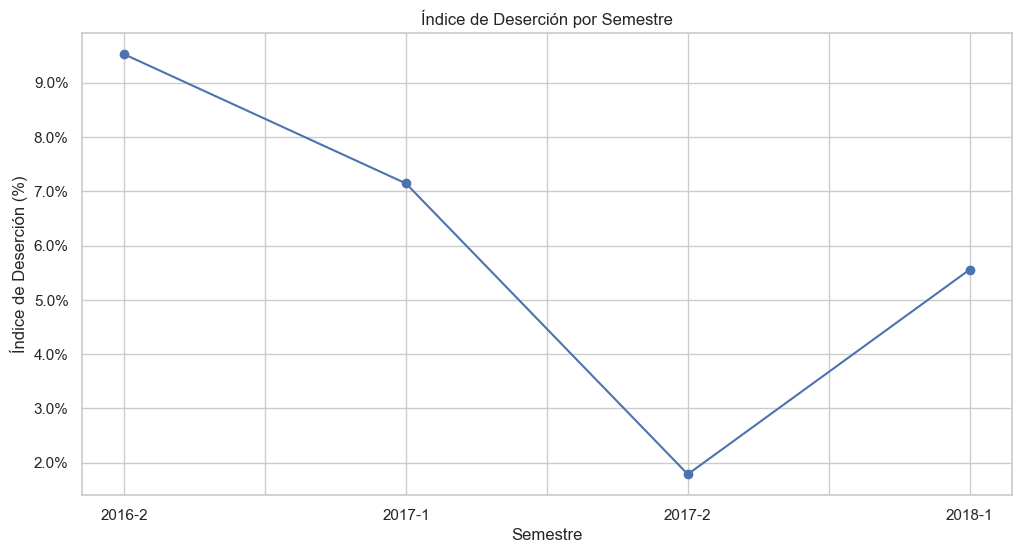

In [38]:
import matplotlib.ticker as mtick

# Convertir los diccionarios a Series de pandas para facilitar el gráfico
indice_desercion_por_semestre_series = pd.Series(indice_desercion_por_semestre)
indice_desercion_por_semestre_series = indice_desercion_por_semestre_series * 100

# Gráfico de Índice de Deserción por Semestre
plt.figure(figsize=(12, 6))
indice_desercion_por_semestre_series.plot(kind='line', marker='o', color='b')
plt.title('Índice de Deserción por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Índice de Deserción (%)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


## Deserción por Cohorte

El Índice de Deserción por Cohorte (ID$_c$) es el porcentaje de desertores de los estudiantes que iniciaron sus estudios en una cohorte específica hasta el tiempo de corte.

La fórmula para calcular la deserción por cohorte es:

$$\text{ID}_c = \left(\frac{\text{ND}_{tc}}{\text{M}_c}\right) \times 100$$

Donde:

- $\text{ID}_c$ = Índice de deserción por cohorte
- $\text{ND}_{tc}$ = Número de desertores en la cohorte $c$ hasta el tiempo de corte $t$
- $\text{M}_c$ = Número de estudiantes matriculados en la cohorte $c$

In [39]:
# Obtenemos la primera matrícula de cada estudiante (su cohorte)
primer_semestre_estudiante = df.groupby('ESTP_ID')['semestre'].min()

# Contar cuántos desertores pertenecen a cada cohorte
desertores_por_cohorte = {}
for cohorte in sorted(primer_semestre_estudiante.unique()):
    # Filtrar los estudiantes que pertenecen a la cohorte actual
    estudiantes_cohorte = primer_semestre_estudiante[primer_semestre_estudiante == cohorte].index
    
    # Filtrar los desertores que pertenecen a esta cohorte
    desertores_cohorte = set()
    for semestre, desertores in desertores_por_semestre.items():
        desertores_en_semestre = set(estudiantes_cohorte).intersection(desertores)
        desertores_cohorte.update(desertores_en_semestre)
    
    # Calcular el índice de deserción para esta cohorte
    num_estudiantes_iniciales = len(estudiantes_cohorte)
    num_desertores = len(desertores_cohorte)
    
    if num_estudiantes_iniciales > 0:
        indice_desercion = (num_desertores / num_estudiantes_iniciales) * 100
    else:
        indice_desercion = 0
    
    # Guardar el índice de deserción para la cohorte actual
    desertores_por_cohorte[cohorte] = indice_desercion

# Imprimir los índices de deserción por cohorte
for cohorte, indice in desertores_por_cohorte.items():
    print(f"Cohorte {cohorte}: Índice de Deserción = {indice:.2f}%")


Cohorte 2015-2: Índice de Deserción = 14.29%
Cohorte 2016-1: Índice de Deserción = 8.33%
Cohorte 2016-2: Índice de Deserción = 18.75%
Cohorte 2017-1: Índice de Deserción = 11.76%
Cohorte 2017-2: Índice de Deserción = 0.00%
Cohorte 2018-1: Índice de Deserción = 0.00%


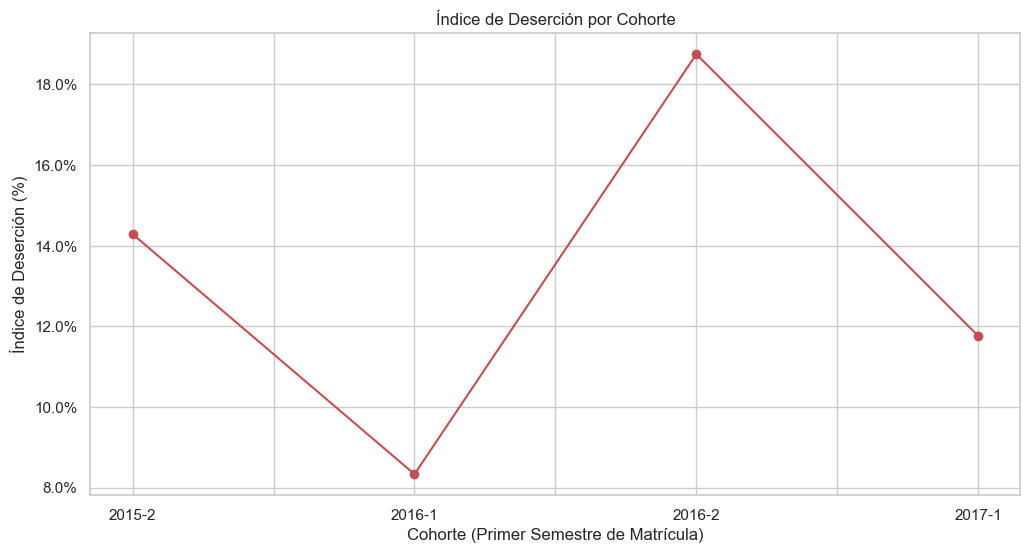

In [40]:
indice_desercion_por_cohorte_series = pd.Series(desertores_por_cohorte)

# Gráfico de Índice de Deserción por Cohorte
plt.figure(figsize=(12, 6))
#indice_desercion_por_cohorte_series.plot(kind='line', marker='o', color='r')
indice_desercion_por_cohorte_series.iloc[:-2].plot(kind='line', marker='o', color='r')
plt.title('Índice de Deserción por Cohorte')
plt.xlabel('Cohorte (Primer Semestre de Matrícula)')
plt.ylabel('Índice de Deserción (%)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## Índice de Deserción Intersemestral

El Índice de Deserción Intersemestral (ID$_i$) se calcula de la siguiente manera:

$$\text{ID}_i = \left(1 - \frac{\text{MT}_{t+1} - \text{NI}_{t+1} + \text{E}_t}{\text{M}_t}\right) \times 100$$

Donde:

- $\text{MT}_{t+1}$ = Número de matriculados total en el semestre $t + 1$.
- $\text{NI}_{t+1}$ = Número de estudiantes matriculados por primera vez en el semestre $t + 1$.
- $\text{E}_t$ = Número de egresados del semestre anterior.
- $\text{M}_t$ = Matrícula total del semestre anterior.

In [41]:
# Lista para almacenar el índice de deserción intersemestral por cada semestre
indice_desercion_intersemestral = {}

# Iterar sobre la lista de semestres, comenzando desde el segundo semestre
for i in range(1, len(lista_semestres)):
    semestre_actual = lista_semestres[i]
    semestre_anterior = lista_semestres[i - 1]
    
    # Número de matriculados total en el semestre t+1
    MT_t1 = df[df['semestre'] == semestre_actual].shape[0]
    
    # Número de estudiantes que se matricularon por primera vez en el semestre t+1
    nuevos_estudiantes = df.groupby('ESTP_ID')['semestre'].min()
    NI_t1 = (nuevos_estudiantes == semestre_actual).sum()
    
    # Matrícula total del semestre anterior (M_t)
    M_t = df[df['semestre'] == semestre_anterior].shape[0]
    
    # Cálculo del índice de deserción intersemestral
    if M_t > 0:
        ID_i = (1 - (MT_t1 - NI_t1) / M_t) * 100
    else:
        ID_i = 0  # En caso de que no haya estudiantes en el semestre anterior
    
    # Almacenar el índice de deserción para el semestre actual
    indice_desercion_intersemestral[semestre_actual] = ID_i

# Convertir el diccionario a un DataFrame para facilitar la visualización
df_desercion_intersemestral = pd.DataFrame(list(indice_desercion_intersemestral.items()), columns=['Semestre', 'Indice_Desercion'])

# Eliminar el último semestre del DataFrame
df_desercion_intersemestral = df_desercion_intersemestral.iloc[:-1]

# Imprimir el DataFrame resultante
df_desercion_intersemestral

,Semestre,Indice_Desercion
0,2016-1,14.285714
1,2016-2,4.761905
2,2017-1,1.785714
3,2017-2,29.166667


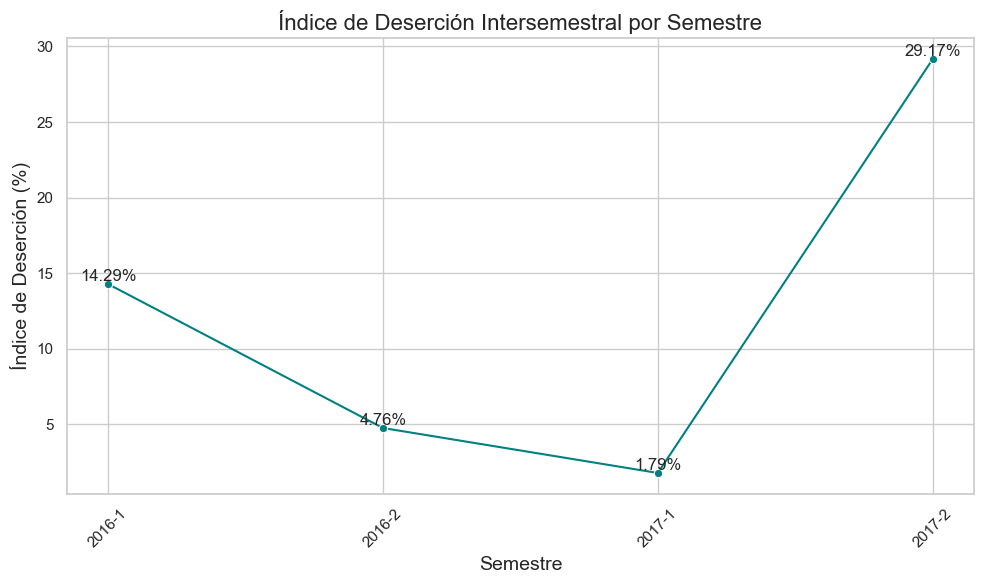

In [42]:
# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Graficar los datos utilizando un gráfico de líneas con puntos
ax = sns.lineplot(data=df_desercion_intersemestral, x='Semestre', y='Indice_Desercion', marker='o', color='teal')

# Añadir título y etiquetas
plt.title('Índice de Deserción Intersemestral por Semestre', fontsize=16)
plt.xlabel('Semestre', fontsize=14)
plt.ylabel('Índice de Deserción (%)', fontsize=14)

# Rotar las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=45)

# Añadir etiquetas de porcentaje en cada punto
for x, y in zip(df_desercion_intersemestral['Semestre'], df_desercion_intersemestral['Indice_Desercion']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

# Añadir una cuadrícula para mayor legibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Desertores

In [43]:
# Crear una columna en el DataFrame para indicar si un estudiante es desertor
df['es_desertor'] = False

# Marcar como desertores a los estudiantes identificados previamente
for semestre, desertores in desertores_por_semestre.items():
    df.loc[df['ESTP_ID'].isin(desertores), 'es_desertor'] = True

df.head()


,ESTP_ID,PENG_PRIMERAPELLIDO,PENG_SEGUNDOAPELLIDO,PENG_PRIMERNOMBRE,PENS_DESCRIPCION,FRAN_DESCRIPCION,ESTP_FECHAINGRESO,SITE_DESCRIPCION,MAAC_PROMEDIOGENERAL,ESTP_PROMEDIOGENERAL,...,PENG_SEXO,PEUN_ID,ESTP_CREDITOSAPROBADOS,ESTP_PERIODOACADEMICO,PEUN_ANO,PEUN_PERIODO,semestre,EDAD,ANO_INGRESO,es_desertor
0,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,ACTIVO,4.44,4.17,...,F,727,73,4,2015,2,2015-2,26,2015,False
1,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,SOBRESALIENTE,4.15,4.17,...,F,767,73,4,2016,2,2016-2,26,2015,False
2,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,ACTIVO,4.23,4.17,...,F,747,73,4,2016,1,2016-1,26,2015,False
3,80454,C,M,SANDRA,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-16 13:31:31,SOBRESALIENTE,4.17,4.17,...,F,770,73,4,2017,1,2017-1,26,2015,False
4,80750,R,G,MARLENE,PENSUM PAE2013-1 BCA,NOCTURNA,2015-07-21 13:38:47,ACTIVO,4.75,4.47,...,F,727,73,4,2015,2,2015-2,29,2015,False


C:\Users\Aunak\AppData\Local\Temp\ipykernel_1628\1252881067.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios_por_semestre = df_primer_semestre.groupby(['semestre', 'es_desertor'])['ESTP_PROMEDIOGENERAL'].mean().unstack()


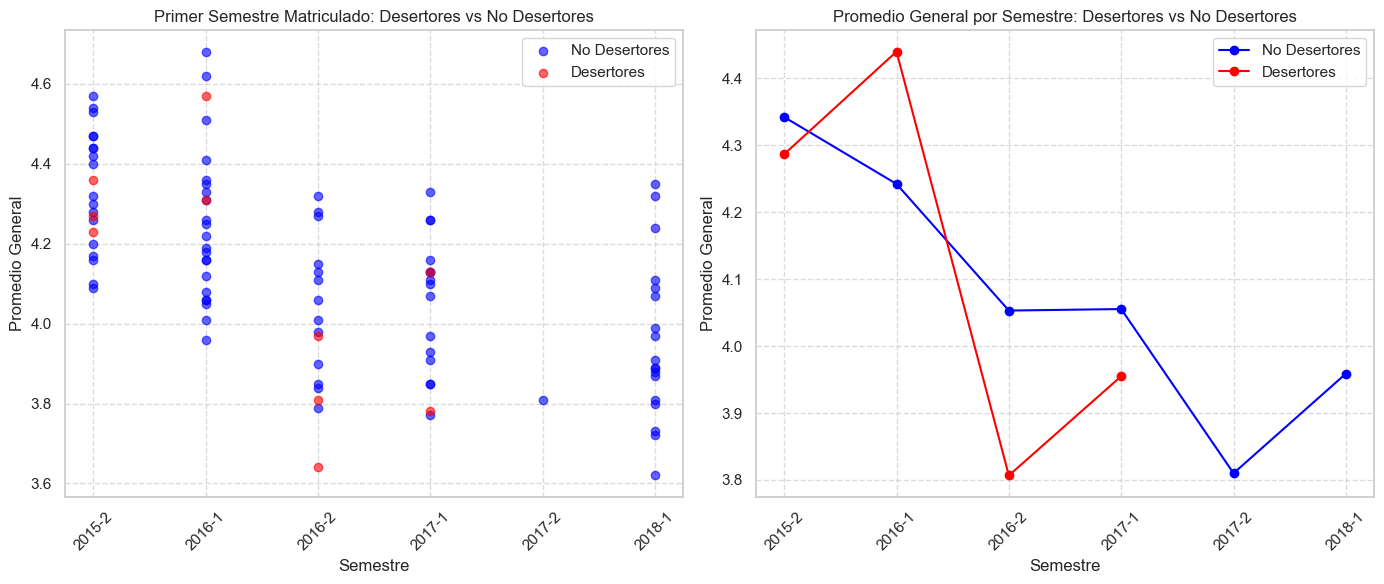

In [44]:
# Suponiendo que 'lista_semestres' ya está definida y contiene los semestres en el orden correcto
#lista_semestres = sorted(df['semestre'].unique())

# Convertir 'semestre' a una categoría con el orden de 'lista_semestres'
df['semestre'] = pd.Categorical(df['semestre'], categories=lista_semestres, ordered=True)

# Obtener el primer semestre de cada estudiante
primer_semestre_estudiante = df.groupby('ESTP_ID')['semestre'].min().reset_index()
primer_semestre_estudiante.columns = ['ESTP_ID', 'primer_semestre']

# Unir el DataFrame original con la Serie de los primeros semestres
df_primer_semestre = pd.merge(df, primer_semestre_estudiante, left_on=['ESTP_ID', 'semestre'], right_on=['ESTP_ID', 'primer_semestre'], how='inner')

# Calcular el promedio general por semestre y por tipo de estudiante (desertor o no)
promedios_por_semestre = df_primer_semestre.groupby(['semestre', 'es_desertor'])['ESTP_PROMEDIOGENERAL'].mean().unstack()

# Crear una figura con dos subplots
plt.figure(figsize=(14, 6))

# Gráfico 1: Primer semestre matriculado
plt.subplot(1, 2, 1)
plt.scatter(
    df_primer_semestre[df_primer_semestre['es_desertor'] == False]['semestre'].astype(str),
    df_primer_semestre[df_primer_semestre['es_desertor'] == False]['ESTP_PROMEDIOGENERAL'],
    color='blue',
    label='No Desertores',
    alpha=0.6
)
plt.scatter(
    df_primer_semestre[df_primer_semestre['es_desertor'] == True]['semestre'].astype(str),
    df_primer_semestre[df_primer_semestre['es_desertor'] == True]['ESTP_PROMEDIOGENERAL'],
    color='red',
    label='Desertores',
    alpha=0.6
)
plt.title('Primer Semestre Matriculado: Desertores vs No Desertores')
plt.xlabel('Semestre')
plt.ylabel('Promedio General')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Gráfico 2: Promedio general por semestre
plt.subplot(1, 2, 2)
plt.plot(promedios_por_semestre.index, promedios_por_semestre[False], marker='o', linestyle='-', color='blue', label='No Desertores')
plt.plot(promedios_por_semestre.index, promedios_por_semestre[True], marker='o', linestyle='-', color='red', label='Desertores')
plt.title('Promedio General por Semestre: Desertores vs No Desertores')
plt.xlabel('Semestre')
plt.ylabel('Promedio General')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar ambas gráficas juntas
plt.tight_layout()
plt.show()


C:\Users\Aunak\AppData\Local\Temp\ipykernel_1628\201429019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = df.groupby(['semestre', 'es_desertor'])['ESTP_PROMEDIOGENERAL'].mean().unstack()


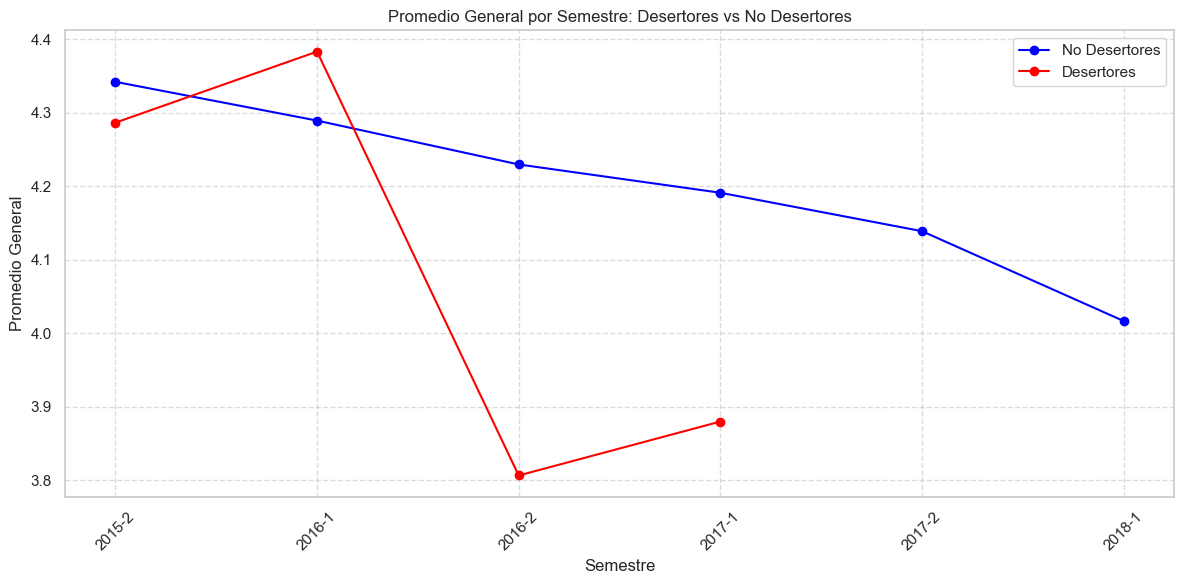


Estadísticas de Promedios:
es_desertor     False     True 
count        6.000000  4.000000
mean         4.201460  4.089167
std          0.115271  0.288153
min          4.016875  3.806667
25%          4.152110  3.861667
50%          4.210567  4.083333
75%          4.274568  4.310833
max          4.342222  4.383333

Diferencia promedio entre No Desertores y Desertores: 0.17


In [45]:
def graficar_calificaciones_desertores(df):
    # Calcular el promedio por semestre, diferenciando entre desertores y no desertores
    promedios = df.groupby(['semestre', 'es_desertor'])['ESTP_PROMEDIOGENERAL'].mean().unstack()

    # Crear la gráfica
    plt.figure(figsize=(12, 6))
    
    # Graficar no desertores
    plt.plot(promedios.index, promedios[False], marker='o', linestyle='-', color='blue', label='No Desertores')
    
    # Graficar desertores
    plt.plot(promedios.index, promedios[True], marker='o', linestyle='-', color='red', label='Desertores')

    plt.title('Promedio General por Semestre: Desertores vs No Desertores')
    plt.xlabel('Semestre')
    plt.ylabel('Promedio General')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

    # Imprimir estadísticas
    #print(promedios)
    print("\nEstadísticas de Promedios:")
    print(promedios.describe())

    # Calcular y mostrar la diferencia promedio
    diferencia_promedio = (promedios[False] - promedios[True]).mean()
    print(f"\nDiferencia promedio entre No Desertores y Desertores: {diferencia_promedio:.2f}")

# Llamar a la función para crear la gráfica
graficar_calificaciones_desertores(df)

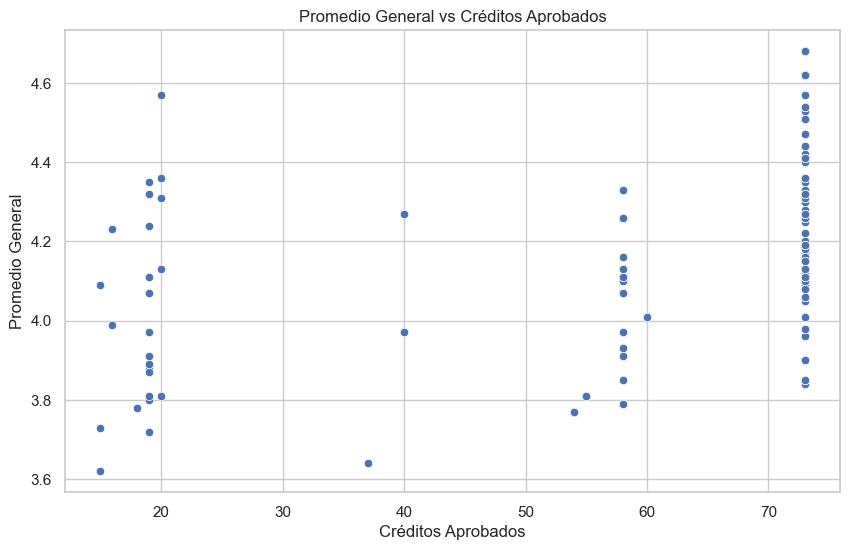

# Análisis Inferenciales

In [81]:
# Calcular estadísticas por sexo
estadisticas_por_sexo = df_ultima_matricula.groupby('PENG_SEXO')['ESTP_PROMEDIOGENERAL'].describe()

# Mostrar los resultados
estadisticas_por_sexo

,count,mean,std,min,25%,50%,75%,max
PENG_SEXO,,,,,,,,
F,82.0,4.135976,0.237538,3.62,3.97,4.14,4.3175,4.68
M,15.0,4.133333,0.233809,3.81,3.94,4.10,4.2650,4.57


In [82]:
# Calcular y mostrar la diferencia entre los promedios
diferencia = estadisticas_por_sexo.loc['F', 'mean'] - estadisticas_por_sexo.loc['M', 'mean']
print(f"\nDiferencia entre promedios (F - M): {diferencia}")


Diferencia entre promedios (F - M): 0.0026422764227627127


In [146]:
# Definicion de prueba estadistica

grupo_f = df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == 'F']['ESTP_PROMEDIOGENERAL']
grupo_m = df_ultima_matricula[df_ultima_matricula['PENG_SEXO'] == 'M']['ESTP_PROMEDIOGENERAL']

# prueba de Normalidad Shapiro-Wilk(n<50)
stat_m, p_m = stats.shapiro(grupo_f)
stat_h, p_h = stats.shapiro(grupo_m)

from IPython.display import display, Markdown
# Resultados de la prueba de Normalidad
mensaje = f"""
**Resultados de la prueba de Normalidad**

- **Estadistico Mujeres:** {stat_m}, **Valor p:** {p_m}
- **Estadistico Hombres:** {stat_h}, **Valor p:** {p_h}

**H0: Los datos siguen una distribucion normal | H1: Los datos NO siguen una distribucion normal**

Si p<0.05: se rechaza H0 y se acepta H1

Si p>0.05: se acepta H0

**Conclusión:**
Con un valor p de **{p_m:.4f}** para las mujeres y **{p_h:.4f}** para los hombres, no existe evidencia suficiente para rechazar la hipótesis nula y debemos concluir que los datos de ambos sexos siguen una distribucion normal.
"""

# Mostrar el mensaje en formato Markdown
display(Markdown(mensaje))




**Resultados de la prueba de Normalidad**

- **Estadistico Mujeres:** 0.9882817005386558, **Valor p:** 0.6675736668052222
- **Estadistico Hombres:** 0.9277776992968312, **Valor p:** 0.25272209323778405

**H0: Los datos siguen una distribucion normal | H1: Los datos NO siguen una distribucion normal**

Si p<0.05: se rechaza H0 y se acepta H1

Si p>0.05: se acepta H0

**Conclusión:**
Con un valor p de **0.6676** para las mujeres y **0.2527** para los hombres, no existe evidencia suficiente para rechazar la hipótesis nula y debemos concluir que los datos de ambos sexos siguen una distribucion normal.


In [143]:
# prueba con pingouin
f_normal = pg.normality(grupo_f)
f_normal

,W,pval,normal
ESTP_PROMEDIOGENERAL,0.988282,0.667574,True


In [144]:
m_normal = pg.normality(grupo_m)
m_normal

,W,pval,normal
ESTP_PROMEDIOGENERAL,0.927778,0.252722,True


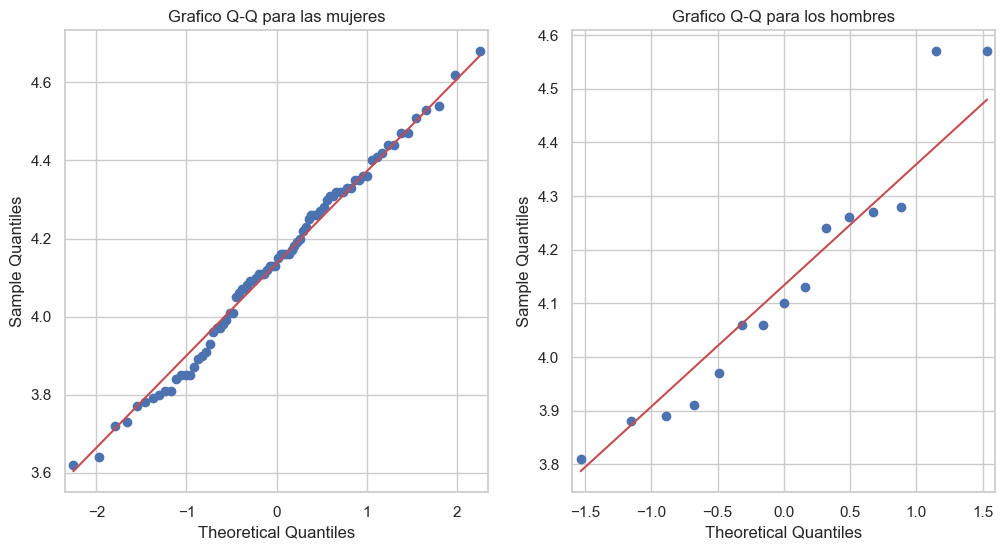

In [99]:
# crear grafico con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sm.qqplot(grupo_f, line='s', ax=axs[0])
axs[0].set_title('Grafico Q-Q para las mujeres')

sm.qqplot(grupo_m, line='s', ax=axs[1])
axs[1].set_title('Grafico Q-Q para los hombres')
plt.show()

In [145]:
# Prueba de Levene(homocedasticidad)
stat, p = stats.levene(grupo_f, grupo_m)

# Resultados de la prueba de Homocedasticidad
mensaje = f"""
**Resultados de la prueba de Homocedasticidad**

- **Estadistico de Levene:** {stat}
- **Valor p:** {p}

**H0: Las varianzas de los grupos son similares | H1: Las varianzas de los grupos son significativamente diferentes**

Si p<0.05: se rechaza H0 y se acepta H1

Si p>=0.05: se acepta H0

**Conclusión:**
Con un valor p de **{p:.4f}**, no existe evidencia suficiente para rechazar la hipótesis nula y debemos concluir que los grupos tienen varianzas similares.
"""
# Mostrar el mensaje en formato Markdown
display(Markdown(mensaje))


**Resultados de la prueba de Homocedasticidad**

- **Estadistico de Levene:** 0.05830792286231847
- **Valor p:** 0.809711040530588

**H0: Las varianzas de los grupos son similares | H1: Las varianzas de los grupos son significativamente diferentes**

Si p<0.05: se rechaza H0 y se acepta H1

Si p>=0.05: se acepta H0

**Conclusión:**
Con un valor p de **0.8097**, no existe evidencia suficiente para rechazar la hipótesis nula y debemos concluir que los grupos tienen varianzas similares.


In [139]:
# levene con pingouin
resultado = pg.homoscedasticity(df_ultima_matricula, dv='ESTP_PROMEDIOGENERAL', group='PENG_SEXO')
resultado

,W,pval,equal_var
levene,0.058308,0.809711,True


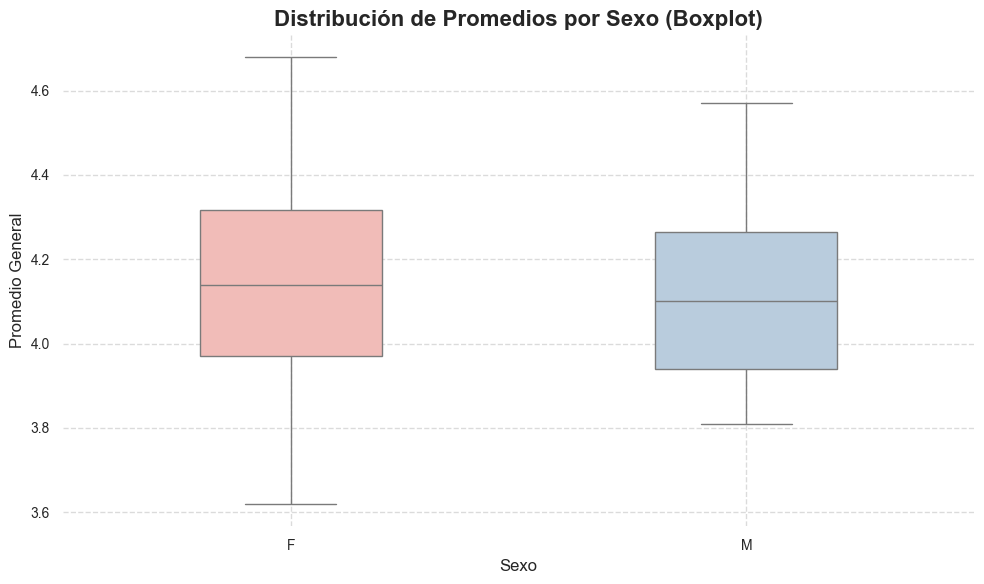

In [127]:
# Grafico Boxplots

plt.figure(figsize=(10, 6))
ax1 = sns.boxplot(x='PENG_SEXO', y='ESTP_PROMEDIOGENERAL', data=df_ultima_matricula, hue='PENG_SEXO', palette="Pastel1", width=0.4, legend=False)
style_plot(ax1, 'Distribución de Promedios por Sexo (Boxplot)', 'Sexo', 'Promedio General')
plt.tight_layout()
plt.show()

In [136]:
# Ralizar la prueba t de Student:
t_stat, p_value = stats.ttest_ind(grupo_f, grupo_m)

#print(f"\nResultados de la prueba t de Student:")
#print(f"Estadístico t: {t_stat:.4f}")
#print(f"Valor p: {p_value:.4f}")

# Calcula la diferencia de promedios
mean_diff = grupo_f.mean() - grupo_m.mean()
#print(f"Diferencia entre promedios (F - M): {mean_diff:.4f}")

# Resultados de la prueba t de Student
mensaje = f"""
**Resultados del Análisis Estadístico**

- **Diferencia entre promedios (F - M):** {mean_diff:.4f}
- **Estadístico t:** {t_stat:.4f}
- **Valor p:** {p_value:.4f}

**Conclusión:**  
Con un valor p de {p_value:.4f}, no existe evidencia suficiente para rechazar la hipótesis nula, lo que indica que no hay una diferencia estadísticamente significativa entre los promedios de las mujeres y los hombres en esta muestra.
"""

# Mostrar el mensaje en formato Markdown
display(Markdown(mensaje))


**Resultados del Análisis Estadístico**

- **Diferencia entre promedios (F - M):** 0.0026
- **Estadístico t:** 0.0397
- **Valor p:** 0.9684

**Conclusión:**  
Con un valor p de 0.9684, no existe evidencia suficiente para rechazar la hipótesis nula, lo que indica que no hay una diferencia estadísticamente significativa entre los promedios de las mujeres y los hombres en esta muestra.


In [138]:
# T con pingouin
resultado = pg.ttest(grupo_f, grupo_m)
resultado

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.040143,19.664553,two-sided,0.968384,"[-0.13, 0.14]",0.011149,0.281,0.050177


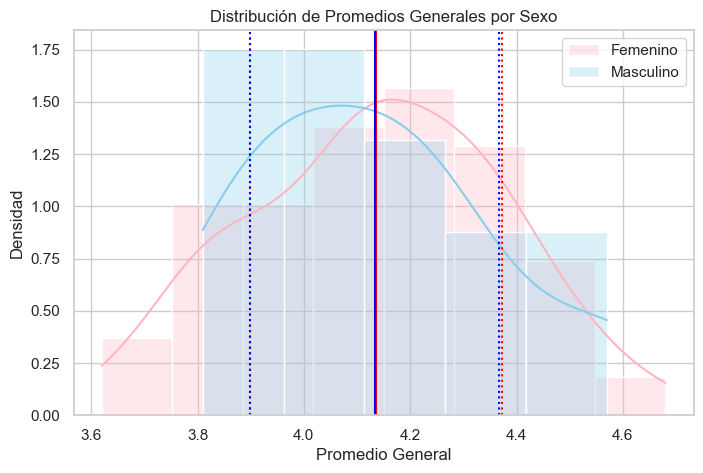

In [154]:
# Cálculo de medias y desviaciones estándar
media_f, std_f = grupo_f.mean(), grupo_f.std()
media_m, std_m = grupo_m.mean(), grupo_m.std()

# Rango de valores para la distribución
x = np.linspace(min(grupo_f.min(), grupo_m.min()), max(grupo_f.max(), grupo_m.max()), 100)

y_f = stats.norm.pdf(x, media_f, std_f)
y_m = stats.norm.pdf(x, media_m, std_m)

# Gráfica
plt.figure(figsize=(8, 5))
sns.histplot(grupo_f, kde=True, color='lightpink', label='Femenino', stat='density', alpha=0.3)
sns.histplot(grupo_m, kde=True, color='skyblue', label='Masculino', stat='density', alpha=0.3)
#plt.plot(x, y_f, color='red', linestyle='dashed', label='Gauss Femenino')
#plt.plot(x, y_m, color='blue', linestyle='dashed', label='Gauss Masculino')

# Líneas verticales para medias y desviaciones estándar
for i in [-1, 0, 1]:
    plt.axvline(media_f + i * std_f, color='red', linestyle='solid' if i == 0 else 'dotted')
    plt.axvline(media_m + i * std_m, color='blue', linestyle='solid' if i == 0 else 'dotted')

# Configuración de la gráfica
plt.xlabel('Promedio General')
plt.ylabel('Densidad')
plt.title('Distribución de Promedios Generales por Sexo')
plt.legend()
plt.show()